In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
startups=pd.read_csv('50_Startups.csv')

In [3]:
startups.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
startups['State']=pd.Categorical(startups['State'])
startups['State']=startups['State'].cat.codes

In [5]:
startups.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [6]:
startups.rename(columns={'R&D Spend':'RD','Administration':'admin','Marketing Spend':'market'},inplace=True) 
startups.head()

,RD,admin,market,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [7]:
startups.shape

(50, 5)

In [8]:
startups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RD      50 non-null     float64
 1   admin   50 non-null     float64
 2   market  50 non-null     float64
 3   State   50 non-null     int8   
 4   Profit  50 non-null     float64
dtypes: float64(4), int8(1)
memory usage: 1.7 KB


In [9]:
startups.describe()

,RD,admin,market,State,Profit
count,50.000000,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,1.000000,112012.639200
std,45902.256482,28017.802755,122290.310726,0.832993,40306.180338
min,0.000000,51283.140000,0.000000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,0.000000,90138.902500
50%,73051.080000,122699.795000,212716.240000,1.000000,107978.190000
75%,101602.800000,144842.180000,299469.085000,2.000000,139765.977500
max,165349.200000,182645.560000,471784.100000,2.000000,192261.830000


In [10]:
null=startups.isnull()
null.head(2)

,RD,admin,market,State,Profit
0,False,False,False,False,False
1,False,False,False,False,False


In [11]:
startups.isnull().sum()

RD        0
admin     0
market    0
State     0
Profit    0
dtype: int64

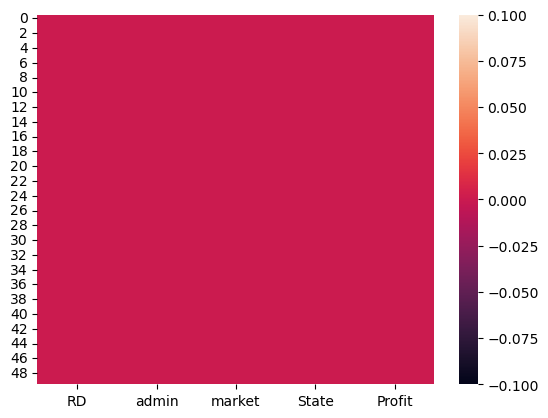

In [12]:
sns.heatmap(data=null)
plt.show()

In [13]:
startups.duplicated().sum()

0

In [14]:
startups.corr()

,RD,admin,market,State,Profit
RD,1.000000,0.241955,0.724248,0.104685,0.972900
admin,0.241955,1.000000,-0.032154,0.011847,0.200717
market,0.724248,-0.032154,1.000000,0.077670,0.747766
State,0.104685,0.011847,0.077670,1.000000,0.101796
Profit,0.972900,0.200717,0.747766,0.101796,1.000000


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

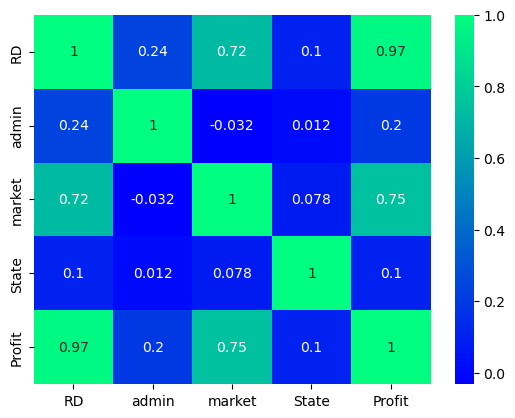

In [15]:
sns.heatmap(startups.corr(),annot=True,cmap='winter')
plt.plot

Visualise the data

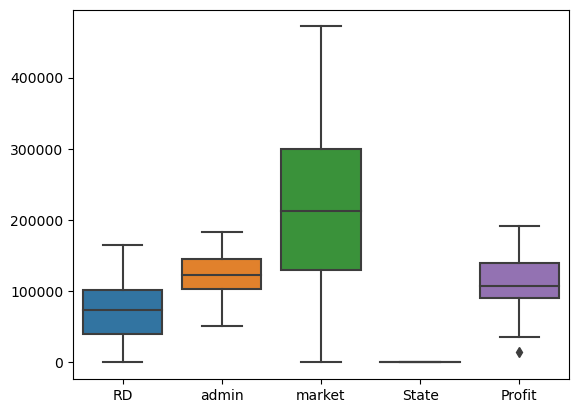

In [16]:
sns.boxplot(data=startups)
plt.show()

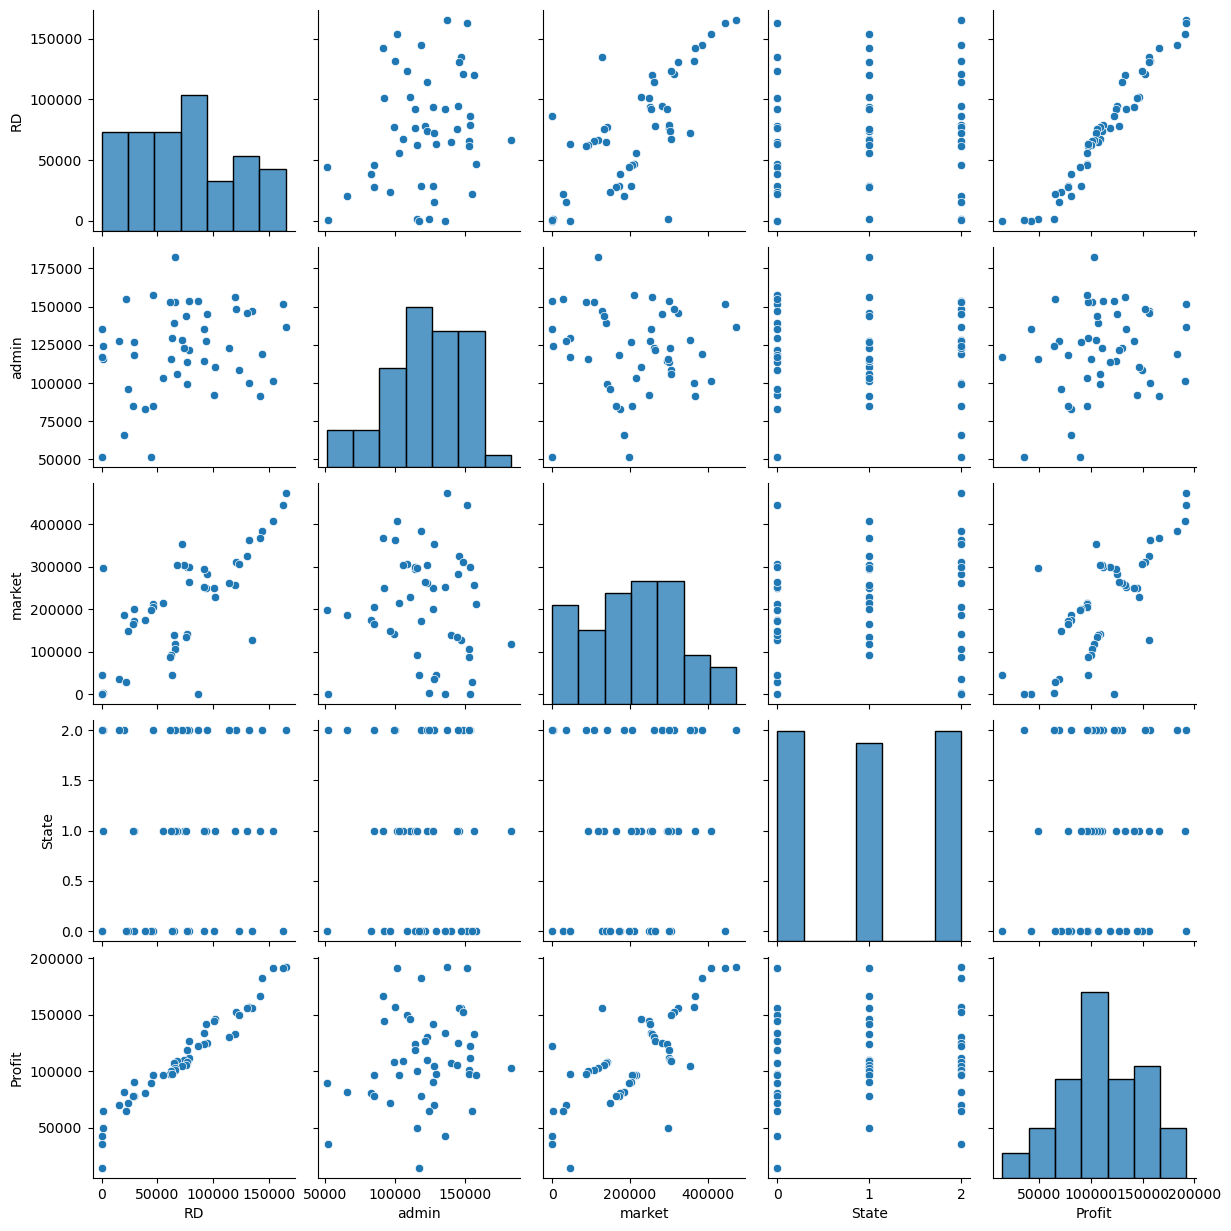

In [17]:
sns.pairplot(data=startups)
plt.show()

# Performing some basic Statistics

In [18]:
startups.RD.mean(),startups.admin.mean(),startups.market.mean(),startups.Profit.mean()

(73721.6156, 121344.63960000001, 211025.09780000002, 112012.63920000002)

In [19]:
startups.RD.mode()[0],startups.admin.mode()[0],startups.market.mode()[0],startups.Profit.mode()[0]

(0.0, 51283.14, 0.0, 14681.4)

In [20]:
startups.RD.median(),startups.admin.median(),startups.market.median(),startups.Profit.median()

(73051.08, 122699.795, 212716.24, 107978.19)

In [21]:
std1=startups.RD.std()
std1

45902.25648230753

In [22]:
v1=std1**2
v1

2107017150.1675436

In [23]:
std2=startups.admin.std()
std2

28017.802755488683

In [24]:
v2=std2**2
v2

784997271.2454692

In [25]:
std3=startups.market.std()
std3

122290.31072584528

In [26]:
v3=std3**2
v3

14954920097.42379

In [27]:
std4=startups.Profit.std()
std4

40306.18033765055

In [28]:
v4=std4**2
v4

1624588173.4112077

# preparing the model

 Build the model

In [29]:
import statsmodels.formula.api as smf
model=smf.ols('Profit~RD+admin+market+State',data=startups).fit()

In [30]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Sat, 23 Sep 2023   Prob (F-statistic):           8.51e-29
Time:                        08:40:00   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.014e+04   6804.555      7.369      0.000    3.64e+04    6.38e+04
RD             0.8058      0.046     17.609      0.000       0.714       0.898
admin         -0.0268      0.052     -0.520      0.606      -0.131       0.077
market         0.0272      0.017      1.637      0.109      -0.006       0.061
State        -22.3206   1609.829     -0.014      0.989   -3264.682    3220.041
==============================================================================
Omnibus:                       14.864   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.542
Skew:                          -0.949   Prob(JB):                     2.10e-05
Kurtosis:                       5.596   Cond. No.                     1.44e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
pa=model.params
t=model.tvalues
p=model.pvalues

In [32]:
pa

Intercept    50142.506443
RD               0.805760
admin           -0.026826
market           0.027228
State          -22.320577
dtype: float64

In [33]:
t

Intercept     7.368962
RD           17.608621
admin        -0.519906
market        1.636966
State        -0.013865
dtype: float64

In [34]:
p

Intercept    2.900008e-09
RD           8.249206e-22
admin        6.056771e-01
market       1.086131e-01
State        9.889988e-01
dtype: float64

In [35]:
startup_RandD_spend=smf.ols('Profit~RD',data=startups).fit()
startup_RandD_spend.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Sat, 23 Sep 2023   Prob (F-statistic):           3.50e-32
Time:                        08:40:00   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
RD             0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
startup_Administration=smf.ols('Profit~admin',data=startups).fit()
startup_Administration.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Sat, 23 Sep 2023   Prob (F-statistic):              0.162
Time:                        08:40:01   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
admin          0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
startup_Marketing_Spend=smf.ols('Profit~market',data=startups).fit()
startup_Marketing_Spend.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Sat, 23 Sep 2023   Prob (F-statistic):           4.38e-10
Time:                        08:40:01   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept       6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
market         0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
startup_State=smf.ols('Profit~State',data=startups).fit()
startup_State.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.5026
Date:                Sat, 23 Sep 2023   Prob (F-statistic):              0.482
Time:                        08:40:01   Log-Likelihood:                -600.39
No. Observations:                  50   AIC:                             1205.
Df Residuals:                      48   BIC:                             1209.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.071e+05   9005.386     11.891      0.000     8.9e+04    1.25e+05
State       4925.6356   6947.806      0.709      0.482   -9043.865    1.89e+04
==============================================================================
Omnibus:                        0.023   Durbin-Watson:                   0.045
Prob(Omnibus):                  0.989   Jarque-Bera (JB):                0.134
Skew:                           0.047   Prob(JB):                        0.935
Kurtosis:                       2.765   Cond. No.                         2.91
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# calculating VIF(varianve influance factor)

In [39]:
rsq_RandD_spend=smf.ols('RD~admin+market+State',data=startups).fit().rsquared
vif_RandD_spend=1/(1-rsq_RandD_spend)
rsq_Administration=smf.ols('admin~RD+market+State',data=startups).fit().rsquared
vif_Administration=1/(1-rsq_Administration)
rsq_Marketing_Spend=smf.ols('market~admin+RD+State',data=startups).fit().rsquared
vif_Marketing_Spend=1/(1-rsq_Marketing_Spend)
rsq_State=smf.ols('State~market+admin+RD',data=startups).fit().rsquared
vif_State=1/(1-rsq_State)

In [40]:
vif_RandD_spend,vif_Administration,vif_Marketing_Spend,vif_State

(2.481178106641511, 1.1753153231430187, 2.326780136936846, 1.0112807816962477)

# Q-Q plot

In [41]:
R=model.resid

In [42]:
R.head()

0    -240.934416
1    2609.393955
2    8899.431581
3    9224.499382
4   -5954.860630
dtype: float64

In [43]:
import statsmodels.api as sm

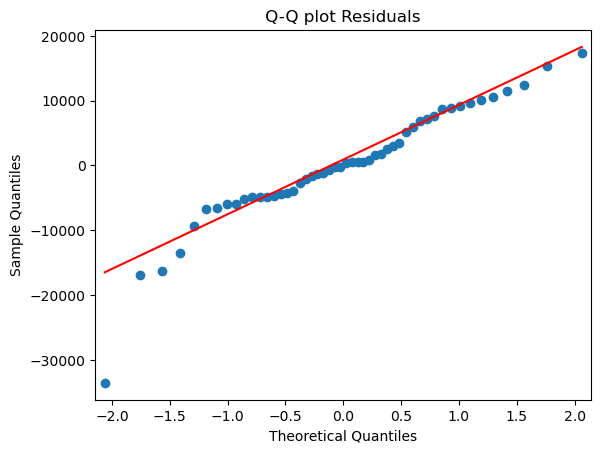

In [44]:
qqplot=sm.qqplot(R,line='q')
plt.title(' Q-Q plot Residuals ')
plt.show()

# plot for regressors vs residuals

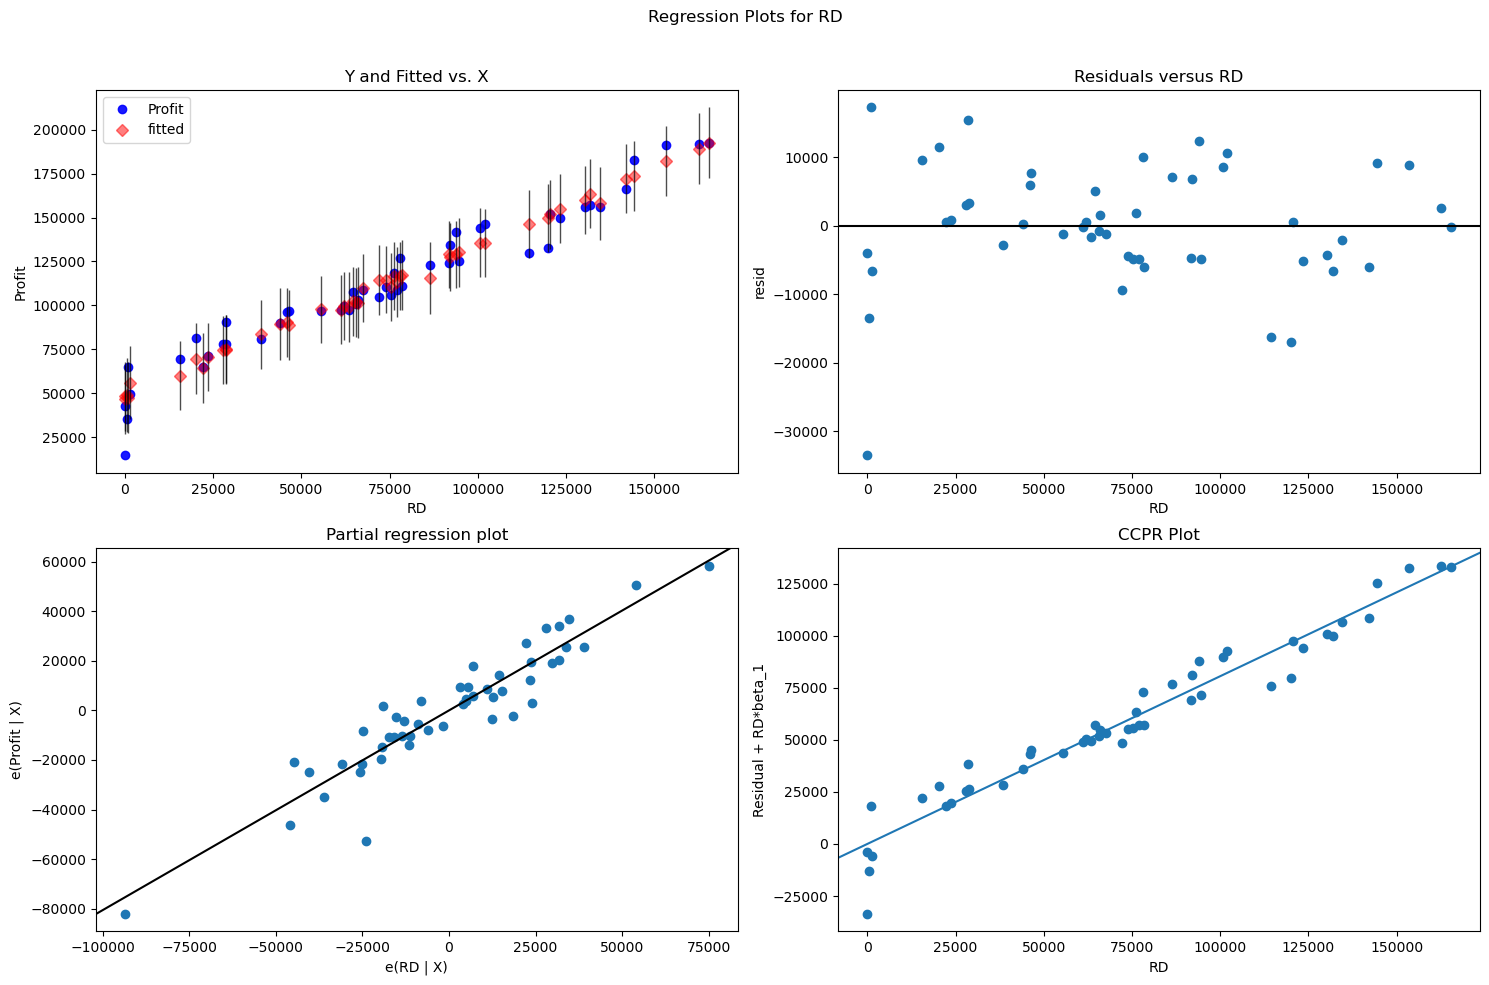

In [45]:
fig=plt.figure(figsize=(15,10))
fig=sm.graphics.plot_regress_exog(model,'RD',fig=fig)
plt.show()

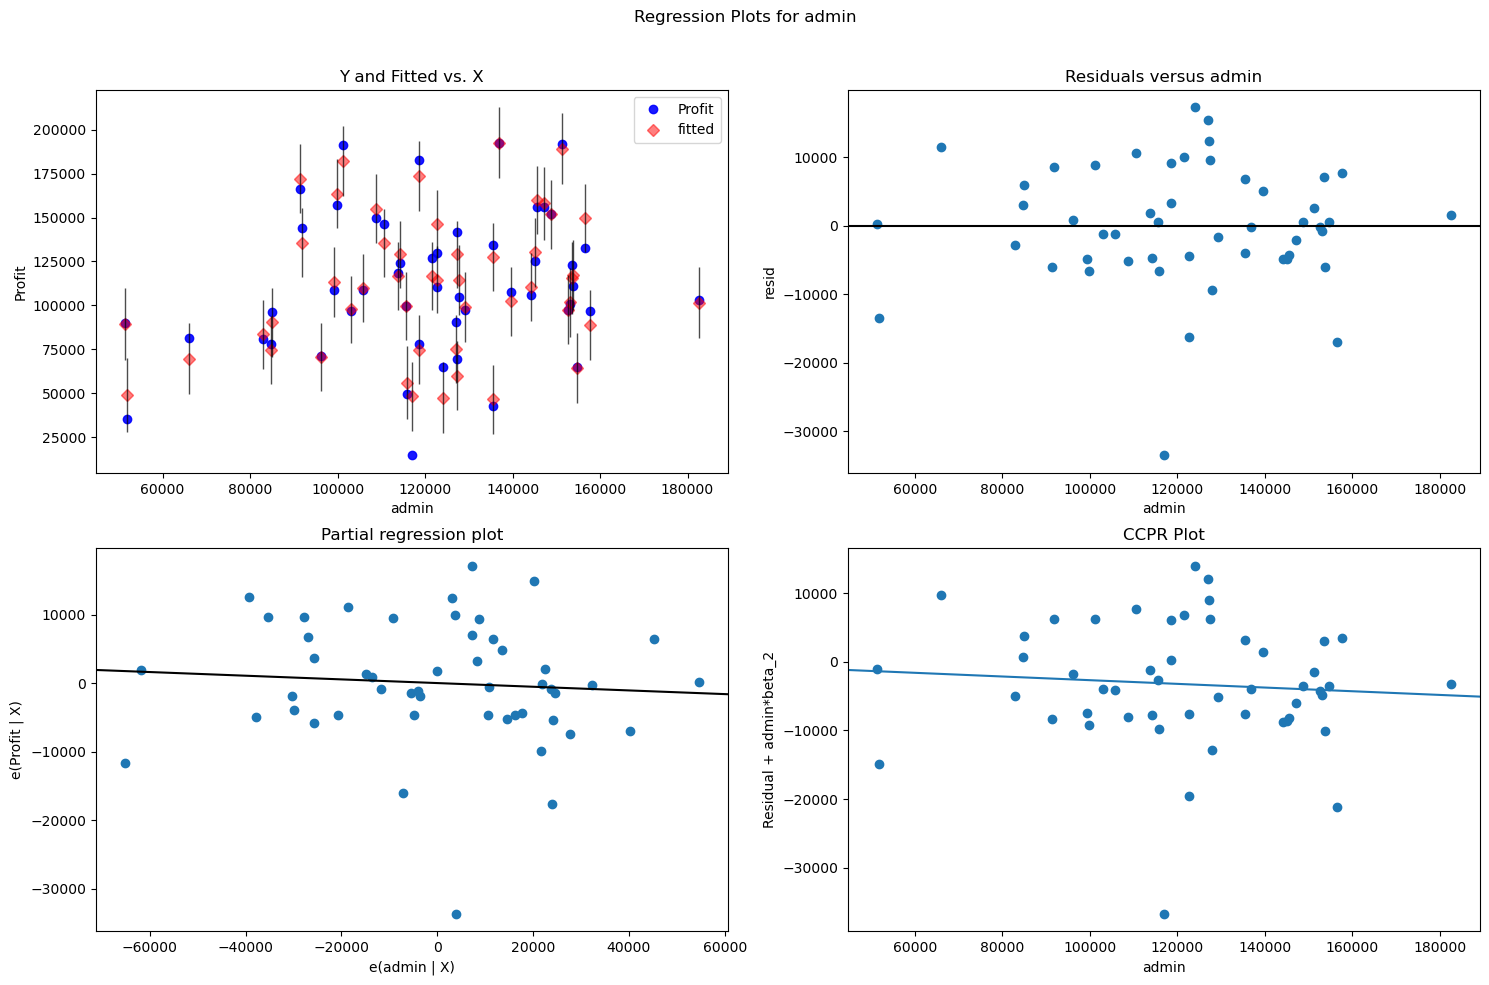

In [46]:
fig=plt.figure(figsize=(15,10))
fig=sm.graphics.plot_regress_exog(model,'admin',fig=fig)
plt.show()

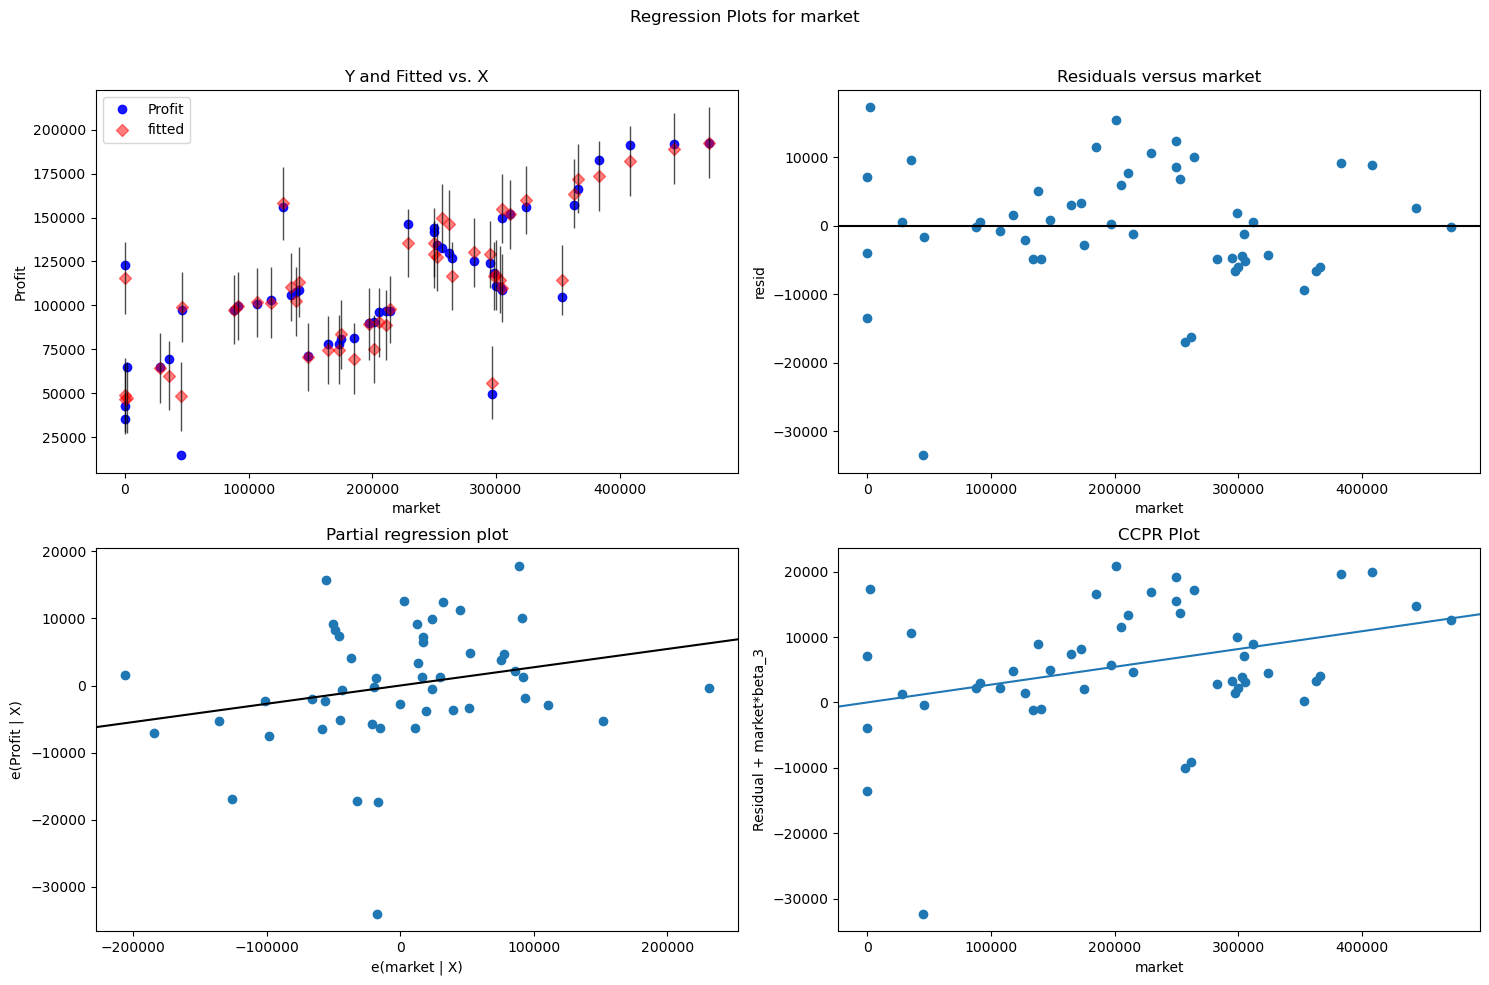

In [47]:
fig=plt.figure(figsize=(15,10))
fig=sm.graphics.plot_regress_exog(model,'market',fig=fig)
plt.show()

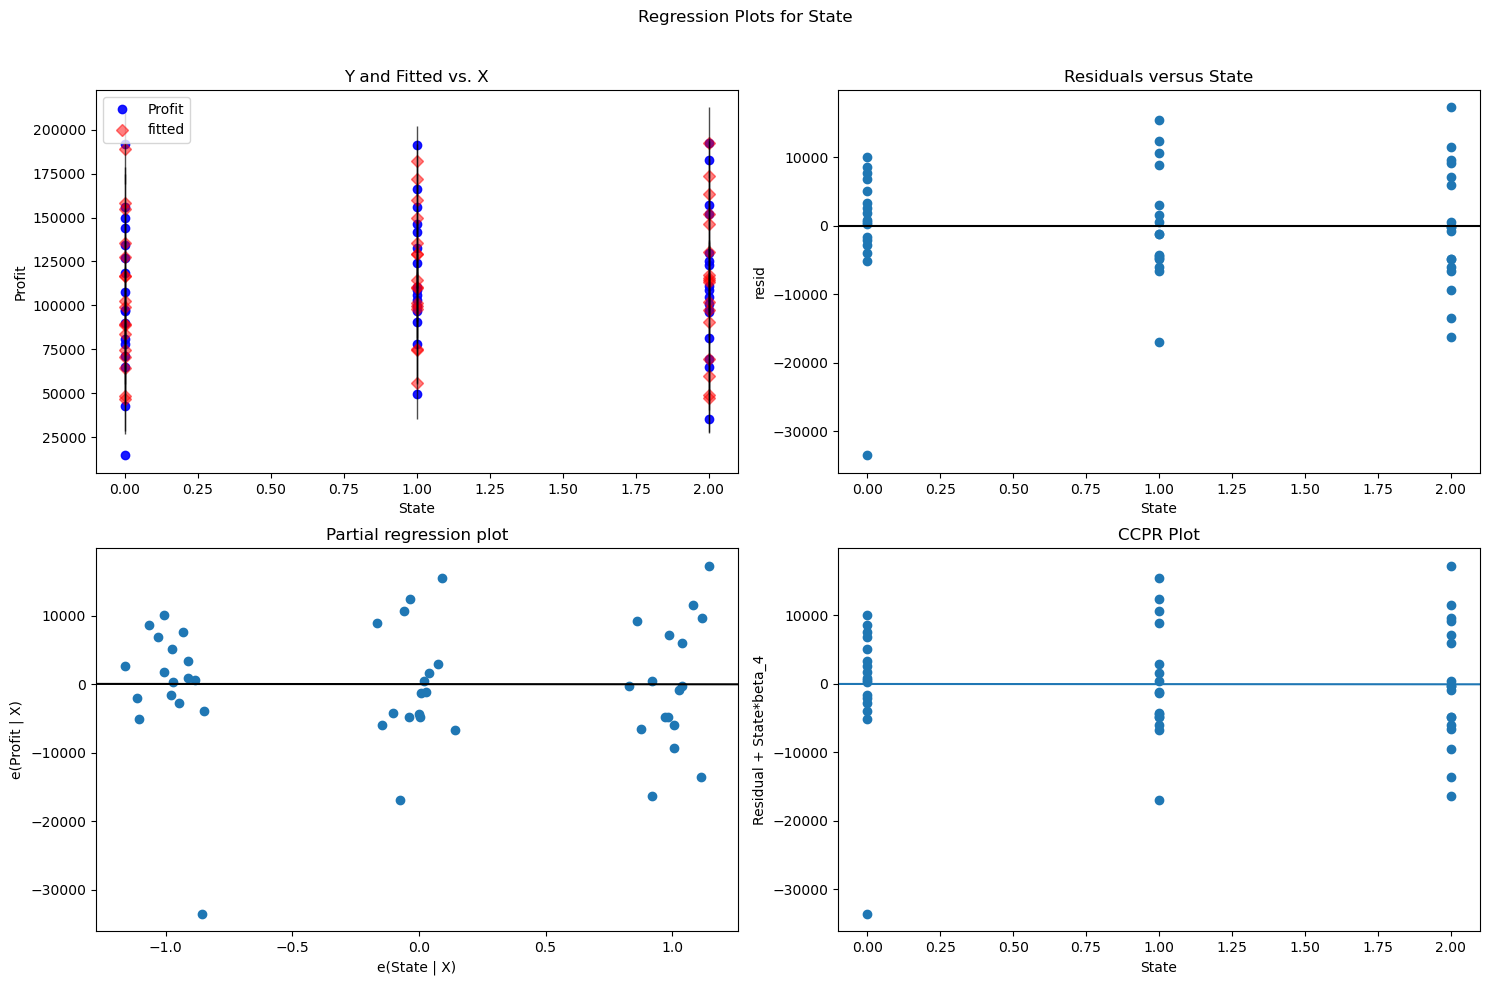

In [48]:
fig=plt.figure(figsize=(15,10))
fig=sm.graphics.plot_regress_exog(model,'State',fig=fig)
plt.show()

# Detecting Influencers/Outliers

In [49]:
model_influence=model.get_influence()
(c,_)=model_influence.cooks_distance

In [50]:
(c,_)

(array([2.64962564e-05, 3.65460668e-03, 2.55553863e-02, 2.31878065e-02,
        1.14302043e-02, 1.23884179e-02, 3.11121982e-03, 2.80901852e-03,
        5.28558551e-05, 6.83388587e-03, 1.18531743e-02, 2.08698178e-02,
        9.05518079e-03, 7.11076506e-03, 4.81255370e-02, 4.55550364e-02,
        1.47917331e-02, 4.44019365e-03, 1.69993736e-03, 3.99363634e-02,
        6.08628041e-04, 1.22997651e-02, 2.28337576e-03, 2.15977000e-04,
        6.00485777e-03, 4.43262172e-03, 2.67612080e-03, 3.28473798e-02,
        1.03151489e-03, 1.51104626e-04, 3.28164666e-05, 9.07970048e-06,
        8.17741552e-04, 1.00239191e-04, 2.18081482e-02, 8.84928027e-03,
        4.36551851e-02, 5.68744297e-05, 6.25167081e-02, 1.85525357e-03,
        2.27307299e-03, 1.55244650e-03, 1.56379369e-04, 2.73167923e-02,
        1.17346160e-04, 1.12202649e-01, 4.28134712e-02, 5.41565252e-03,
        1.91163485e-01, 3.06028195e-01]),
 array([1.        , 0.99999742, 0.99967997, 0.99974785, 0.99995597,
        0.99994626, 0.9999

# stem plot

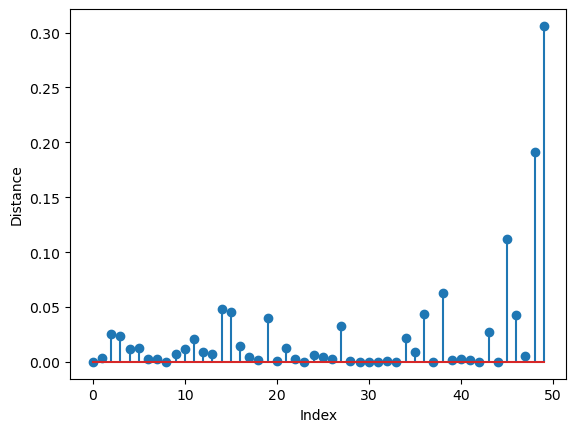

In [51]:
plt.stem(np.arange(len(startups)),np.round(c,5))
plt.xlabel('Index')
plt.ylabel('Distance')
plt.show()

In [52]:
from statsmodels.graphics.regressionplots import influence_plot


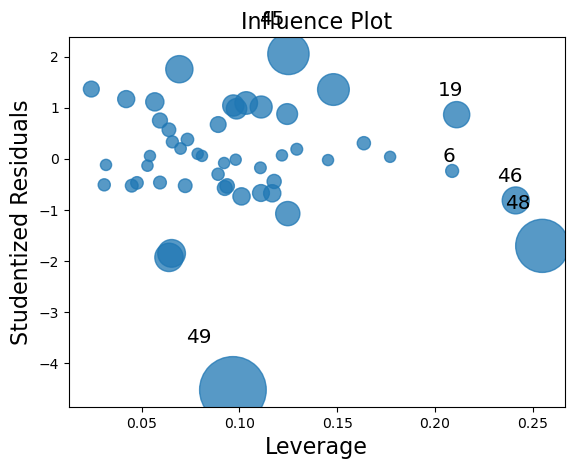

In [53]:
influence_plot(model,figsize=(10,10))
plt.show()

# cutoff

In [178]:
k=toyota.shape[1]
n=toyota.shape[0]
leverage_cutoff=3*((k+1)/n)
leverage_cutoff

0.020891364902506964

# from the above data it clear 49 is the high influence point

In [54]:
startups[startups.index.isin([49])]

,RD,admin,market,State,Profit
49,0.0,116983.8,45173.06,0,14681.4


In [55]:
startups_new=startups.drop(startups.index[49],axis=0).reset_index()
startups_new.head()

,index,RD,admin,market,State,Profit
0,0,165349.20,136897.80,471784.10,2,192261.83
1,1,162597.70,151377.59,443898.53,0,191792.06
2,2,153441.51,101145.55,407934.54,1,191050.39
3,3,144372.41,118671.85,383199.62,2,182901.99
4,4,142107.34,91391.77,366168.42,1,166187.94


In [56]:
startup_new=startups_new.drop(['index'],axis=1)
startup_new.head()

,RD,admin,market,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [57]:
final_startup=smf.ols('Profit~RD+admin+market+State',data=startups_new).fit()
final_startup.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     276.6
Date:                Sat, 23 Sep 2023   Prob (F-statistic):           1.45e-30
Time:                        08:40:28   Log-Likelihood:                -506.00
No. Observations:                  49   AIC:                             1022.
Df Residuals:                      44   BIC:                             1031.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.332e+04   5726.740      9.311      0.000    4.18e+04    6.49e+04
RD             0.7844      0.039     20.367      0.000       0.707       0.862
admin         -0.0225      0.043     -0.522      0.604      -0.109       0.064
market         0.0252      0.014      1.811      0.077      -0.003       0.053
State       -969.6140   1360.800     -0.713      0.480   -3712.127    1772.899
==============================================================================
Omnibus:                        0.042   Durbin-Watson:                   1.663
Prob(Omnibus):                  0.979   Jarque-Bera (JB):                0.215
Skew:                           0.042   Prob(JB):                        0.898
Kurtosis:                       2.686   Cond. No.                     1.45e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# split the data

In [58]:
X=startups[['RD','admin','market','State']]
y=startups['Profit']

In [59]:
X.head()

,RD,admin,market,State
0,165349.20,136897.80,471784.10,2
1,162597.70,151377.59,443898.53,0
2,153441.51,101145.55,407934.54,1
3,144372.41,118671.85,383199.62,2
4,142107.34,91391.77,366168.42,1


In [60]:
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

# build the training and testing data

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((40, 4), (10, 4), (40,), (10,))

# Build a  regression model

In [63]:
from sklearn.linear_model import LinearRegression

In [64]:
reg_model=LinearRegression()

In [65]:
reg_model.fit(X_train,y_train)

LinearRegression()

In [66]:
train_pred=reg_model.predict(X_train)
train_pred

array([ 98304.00094746,  50257.84870619, 116827.44772029, 115570.75413957,
       130256.8385999 , 117002.50441534, 130313.70615847, 155858.09924036,
       154148.16572032, 161665.18571418,  92237.87493339,  71167.99871636,
       150781.84340514, 101393.55559887,  87830.84244634, 177018.9812493 ,
       110963.10580809, 111027.43881386,  75149.12933069, 184894.59774207,
       136283.14786408,  46488.83800427,  98687.76041598, 101528.63823845,
        89740.17906533, 158604.29309323, 102894.77741357,  62788.80284517,
       132130.14892034, 127467.91003469,  99954.71511588, 116656.77545783,
        55752.91764322, 174756.54979285,  47803.17658177, 136974.35131337,
        73746.06149877,  44474.77418115,  75134.49954896, 116224.4635649 ])

In [67]:
test_pred=reg_model.predict(X_test)
test_pred

array([196094.60980958,  69719.52911414,  98593.53130732, 118857.62767913,
       115414.38277775, 148815.41277548, 166892.9902327 ,  60585.54507476,
        83309.05752358, 190459.02011781])

#  find the metrics for regression

In [68]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [69]:
train_mse=mean_squared_error(y_train,train_pred)
train_mse

84181156.51967621

In [70]:
test_mse=mean_squared_error(y_test,test_pred)
test_mse

67159018.13335295

In [71]:
train_rmse=np.sqrt(train_mse)
test_rmse=np.sqrt(test_mse)

In [72]:
train_rmse

9175.028965604208

In [73]:
test_rmse

8195.060593635226

# predicting new data

In [74]:
new_data=pd.DataFrame({'RD':92000,'admin':120000,'market':30000,'State':2},index=[1])
new_data

,RD,admin,market,State
1,92000,120000,30000,2


In [75]:
reg_model.predict(new_data)

array([123788.38822123])

# Table containing R^2 value for each prepared model.


In [76]:
dframe=pd.DataFrame(
[
    ['initial_combine_all_features',0.951],
    ['RD',0.947],
    ['admin',0.040],
    ['market',0.559],
    ['State',0.010],
    ['final_combine_all_features',0.962]
],index=[1,2,3,4,5,6],columns=['Features_Name','R_square_value'])

In [77]:
dframe

,Features_Name,R_square_value
1,initial_combine_all_features,0.951
2,RD,0.947
3,admin,0.040
4,market,0.559
5,State,0.010
6,final_combine_all_features,0.962


# ________________________________________________________________

.

# DATA('ToyotaCorolla')

In [78]:
 toyota=pd.read_csv('ToyotaCorolla (1).csv',encoding='latin1')

In [79]:
toyota.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [80]:
toyota.rename(columns={'Age_08_04':'Age'},inplace=True) 
toyota.head()

,Id,Model,Price,Age,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [81]:
toyota.describe()

,Id,Price,Age,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,...,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000
mean,721.555014,10730.824513,55.947075,5.548747,1999.625348,68533.259749,101.502089,0.674791,0.055710,1576.85585,...,0.580084,0.561978,0.977716,0.146240,0.256964,0.300139,0.770195,0.204735,0.145543,0.277855
std,416.476890,3626.964585,18.599988,3.354085,1.540722,37506.448872,14.981080,0.468616,0.229441,424.38677,...,0.493717,0.496317,0.147657,0.353469,0.437111,0.458478,0.420854,0.403649,0.352770,0.448098
min,1.000000,4350.000000,1.000000,1.000000,1998.000000,1.000000,69.000000,0.000000,0.000000,1300.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,361.750000,8450.000000,44.000000,3.000000,1998.000000,43000.000000,90.000000,0.000000,0.000000,1400.00000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,721.500000,9900.000000,61.000000,5.000000,1999.000000,63389.500000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1081.250000,11950.000000,70.000000,8.000000,2001.000000,87020.750000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1442.000000,32500.000000,80.000000,12.000000,2004.000000,243000.000000,192.000000,1.000000,1.000000,16000.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [84]:
toyota=toyota[['Price','Age','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight']]
toyota.head()

,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [85]:
toyota.shape

(1436, 9)

In [86]:
toyota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age            1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [87]:
toyota.isnull().sum()

Price            0
Age              0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

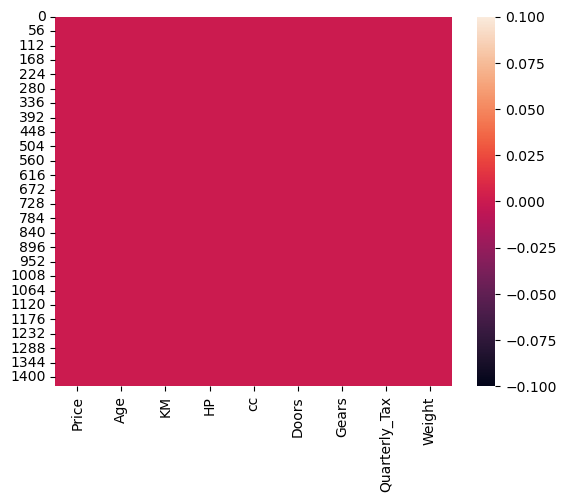

In [88]:
sns.heatmap(toyota.isnull())
plt.show()

In [89]:
toyota.corr

<bound method DataFrame.corr of       Price  Age     KM   HP    cc  Doors  Gears  Quarterly_Tax  Weight
0     13500   23  46986   90  2000      3      5            210    1165
1     13750   23  72937   90  2000      3      5            210    1165
2     13950   24  41711   90  2000      3      5            210    1165
3     14950   26  48000   90  2000      3      5            210    1165
4     13750   30  38500   90  2000      3      5            210    1170
...     ...  ...    ...  ...   ...    ...    ...            ...     ...
1431   7500   69  20544   86  1300      3      5             69    1025
1432  10845   72  19000   86  1300      3      5             69    1015
1433   8500   71  17016   86  1300      3      5             69    1015
1434   7250   70  16916   86  1300      3      5             69    1015
1435   6950   76      1  110  1600      5      5             19    1114

[1436 rows x 9 columns]>

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

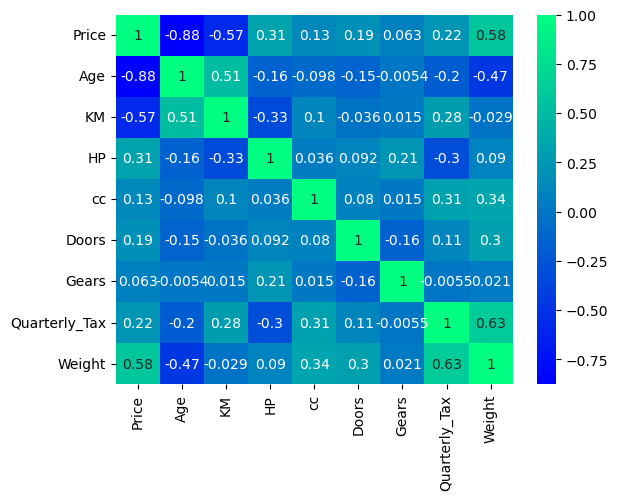

In [90]:
sns.heatmap(toyota.corr(),annot=True,cmap='winter')
plt.plot

In [91]:
toyota.duplicated().sum()

1

In [92]:
toyota.reset_index(drop=True,inplace=True)

In [93]:
#toyota

# visualise the data

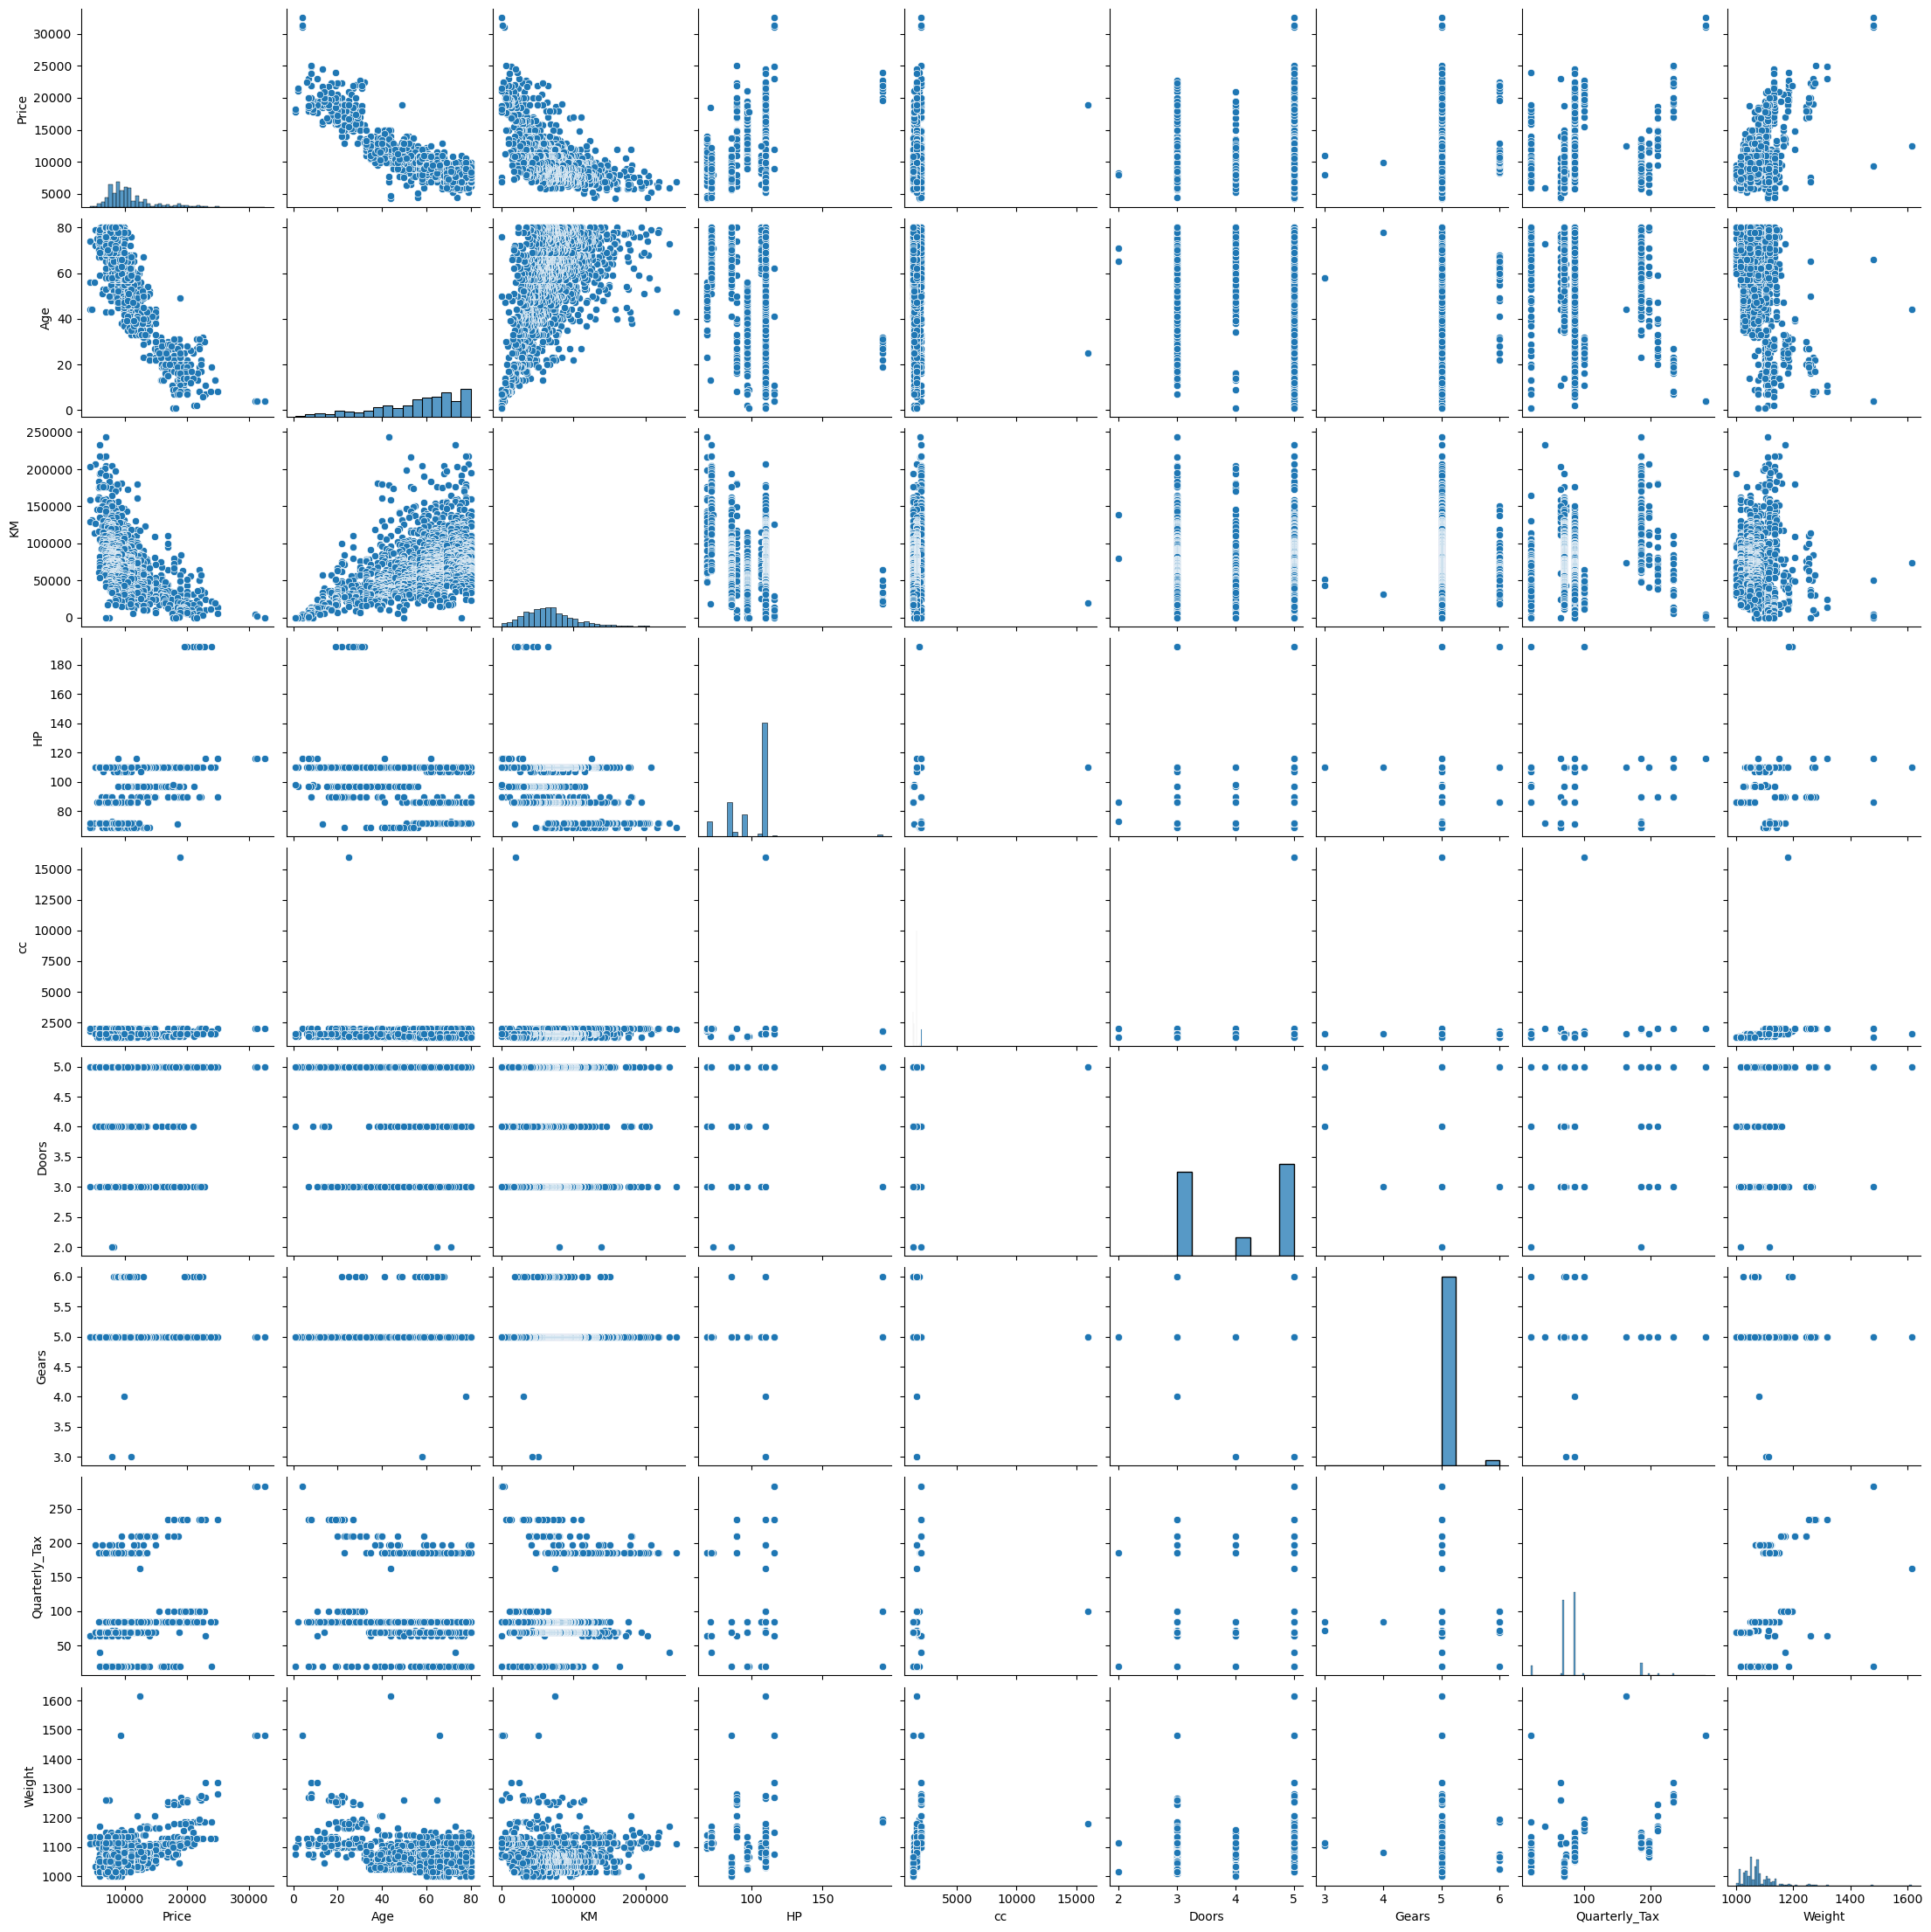

In [202]:
sns.pairplot(data=toyota)

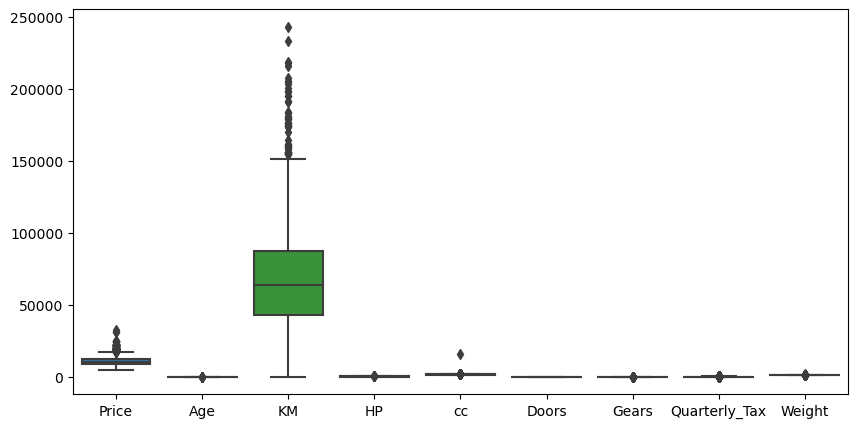

In [206]:
plt.figure(figsize=(10,5))
sns.boxplot(data=toyota)
plt.show()

In [132]:
import statsmodels.formula.api as smf
model=smf.ols('Price~Age+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=toyota).fit()

In [133]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Sat, 23 Sep 2023   Prob (F-statistic):               0.00
Time:                        08:48:52   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age            -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM               -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP               31.6809      2.818     11.241      0.000      26.152      37.209
cc               -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors            -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears           594.3199    197.055      3.016      0.003     207.771     980.869
Quarterly_Tax     3.9491      1.310      3.015      0.003       1.379       6.519
Weight           16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [134]:
params=model.params
tvalue=model.tvalues
pvalue=model.pvalues

In [135]:
params

Intercept       -5573.106358
Age              -121.658402
KM                 -0.020817
HP                 31.680906
cc                 -0.121100
Doors              -1.616641
Gears             594.319936
Quarterly_Tax       3.949081
Weight             16.958632
dtype: float64

In [136]:
tvalue

Intercept        -3.948666
Age             -46.511852
KM              -16.621622
HP               11.241018
cc               -1.344222
Doors            -0.040410
Gears             3.016007
Quarterly_Tax     3.014535
Weight           15.879803
dtype: float64

In [137]:
pvalue

Intercept         8.241949e-05
Age              3.354724e-288
KM                7.538439e-57
HP                3.757218e-28
cc                1.790902e-01
Doors             9.677716e-01
Gears             2.606549e-03
Quarterly_Tax     2.619148e-03
Weight            2.048576e-52
dtype: float64

# Build simple Linear Regression model

In [138]:
toyota_cc=smf.ols('Price~cc',data=toyota).fit()
toyota_cc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     23.28
Date:                Sat, 23 Sep 2023   Prob (F-statistic):           1.55e-06
Time:                        08:48:55   Log-Likelihood:                -13795.
No. Observations:                1436   AIC:                         2.759e+04
Df Residuals:                    1434   BIC:                         2.760e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9027.5548    365.576     24.694      0.000    8310.435    9744.675
cc             1.0802      0.224      4.825      0.000       0.641       1.519
==============================================================================
Omnibus:                      465.181   Durbin-Watson:                   0.267
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1390.401
Skew:                           1.649   Prob(JB):                    1.20e-302
Kurtosis:                       6.516   Cond. No.                     6.29e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [139]:
toyota_Doors=smf.ols('Price~Doors',data=toyota).fit()
toyota_Doors.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     51.00
Date:                Sat, 23 Sep 2023   Prob (F-statistic):           1.46e-12
Time:                        08:48:56   Log-Likelihood:                -13782.
No. Observations:                1436   AIC:                         2.757e+04
Df Residuals:                    1434   BIC:                         2.758e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7885.0058    409.438     19.258      0.000    7081.843    8688.168
Doors        705.5586     98.795      7.142      0.000     511.761     899.356
==============================================================================
Omnibus:                      466.779   Durbin-Watson:                   0.287
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1406.209
Skew:                           1.651   Prob(JB):                    4.42e-306
Kurtosis:                       6.549   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [140]:
toyota_cc_Doors=smf.ols('Price~cc+Doors',data=toyota).fit()
toyota_cc_Doors.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     35.24
Date:                Sat, 23 Sep 2023   Prob (F-statistic):           1.15e-15
Time:                        08:48:56   Log-Likelihood:                -13772.
No. Observations:                1436   AIC:                         2.755e+04
Df Residuals:                    1433   BIC:                         2.757e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6509.4211    515.773     12.621      0.000    5497.670    7521.173
cc             0.9597      0.221      4.340      0.000       0.526       1.393
Doors        671.3973     98.501      6.816      0.000     478.176     864.619
==============================================================================
Omnibus:                      448.845   Durbin-Watson:                   0.290
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1294.854
Skew:                           1.603   Prob(JB):                    6.70e-282
Kurtosis:                       6.370   Cond. No.                     9.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# varianve influance factor

In [141]:
rsq_Age=smf.ols('Age~KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=toyota).fit().rsquared
vif_Age=1/(1-rsq_Age)
rsq_KM=smf.ols('KM~Age+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=toyota).fit().rsquared
vif_KM=1/(1-rsq_KM)
rsq_HP=smf.ols('HP~KM+Age+cc+Doors+Gears+Quarterly_Tax+Weight',data=toyota).fit().rsquared
vif_HP=1/(1-rsq_HP)
rsq_cc=smf.ols('cc~HP+KM+Age+Doors+Gears+Quarterly_Tax+Weight',data=toyota).fit().rsquared
vif_cc=1/(1-rsq_cc)
rsq_Doors=smf.ols('Doors~cc+HP+KM+Age+Gears+Quarterly_Tax+Weight',data=toyota).fit().rsquared
vif_Doors=1/(1-rsq_Doors)
rsq_Gears=smf.ols('Gears~Doors+cc+HP+KM+Age+Quarterly_Tax+Weight',data=toyota).fit().rsquared
vif_Gears=1/(1-rsq_Gears)
rsq_Quarterly_Tax=smf.ols('Quarterly_Tax~Gears+Doors+cc+HP+KM+Age+Weight',data=toyota).fit().rsquared
vif_Quarterly_Tax=1/(1-rsq_Quarterly_Tax)
rsq_Weight=smf.ols('Weight~Quarterly_Tax+Gears+Doors+cc+HP+KM+Age',data=toyota).fit().rsquared
vif_Weight=1/(1-rsq_Weight)

In [142]:
Dict={'variables':['Age','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight'],
                      'VIF':[vif_Age,vif_KM,vif_HP,vif_cc,vif_Doors,vif_Gears,vif_Quarterly_Tax,vif_Weight]}
toyota_Vif=pd.DataFrame(Dict)
toyota_Vif

,variables,VIF
0,Age,1.884620
1,KM,1.756905
2,HP,1.419422
3,cc,1.163894
4,Doors,1.156575
5,Gears,1.098723
6,Quarterly_Tax,2.311431
7,Weight,2.516420


# Test for Residual analysis: test for m=normality of residuals(Q-Q plot)

In [143]:
M=model.resid

In [144]:
M.head()

0   -3312.580505
1   -2522.355186
2   -2850.732460
3   -1476.496731
4   -2472.419010
dtype: float64

# plot

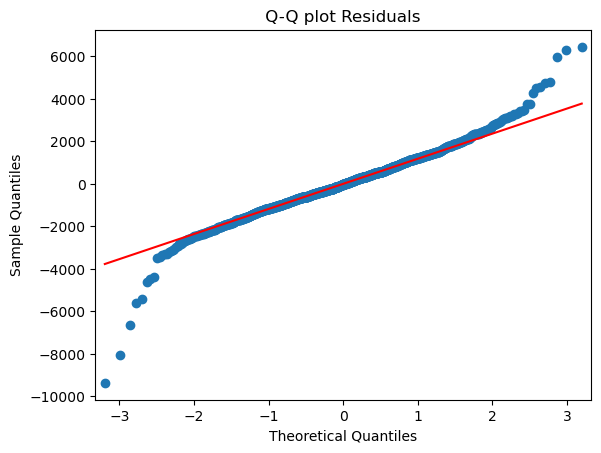

In [145]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q')
plt.title(' Q-Q plot Residuals ')
plt.show()

# plot for regressors vs residuals

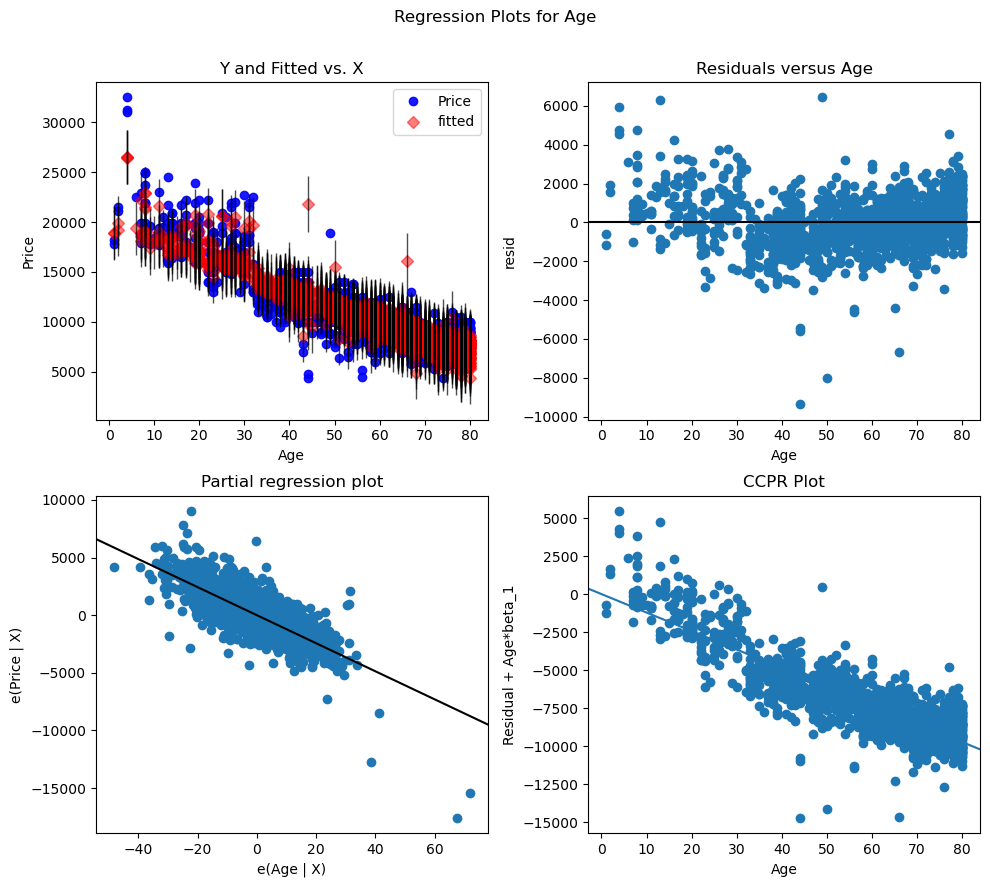

In [146]:
fig=plt.figure(figsize=(10,9))
fig=sm.graphics.plot_regress_exog(model,'Age',fig=fig)
plt.show()

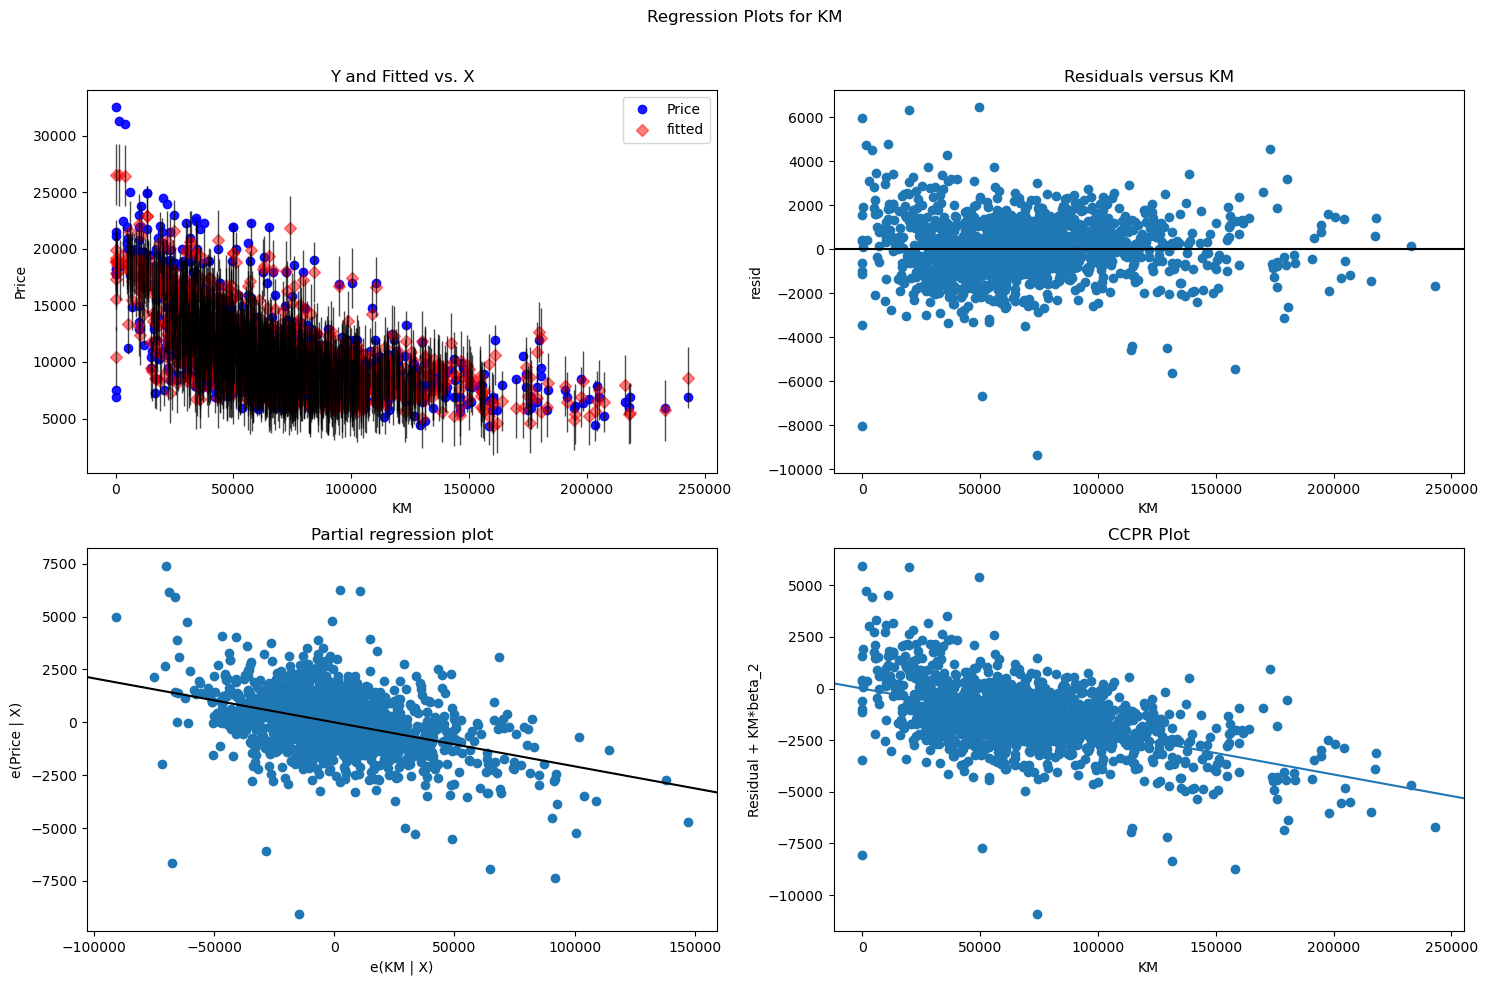

In [147]:
fig=plt.figure(figsize=(15,10))
fig=sm.graphics.plot_regress_exog(model,'KM',fig=fig)
plt.show()

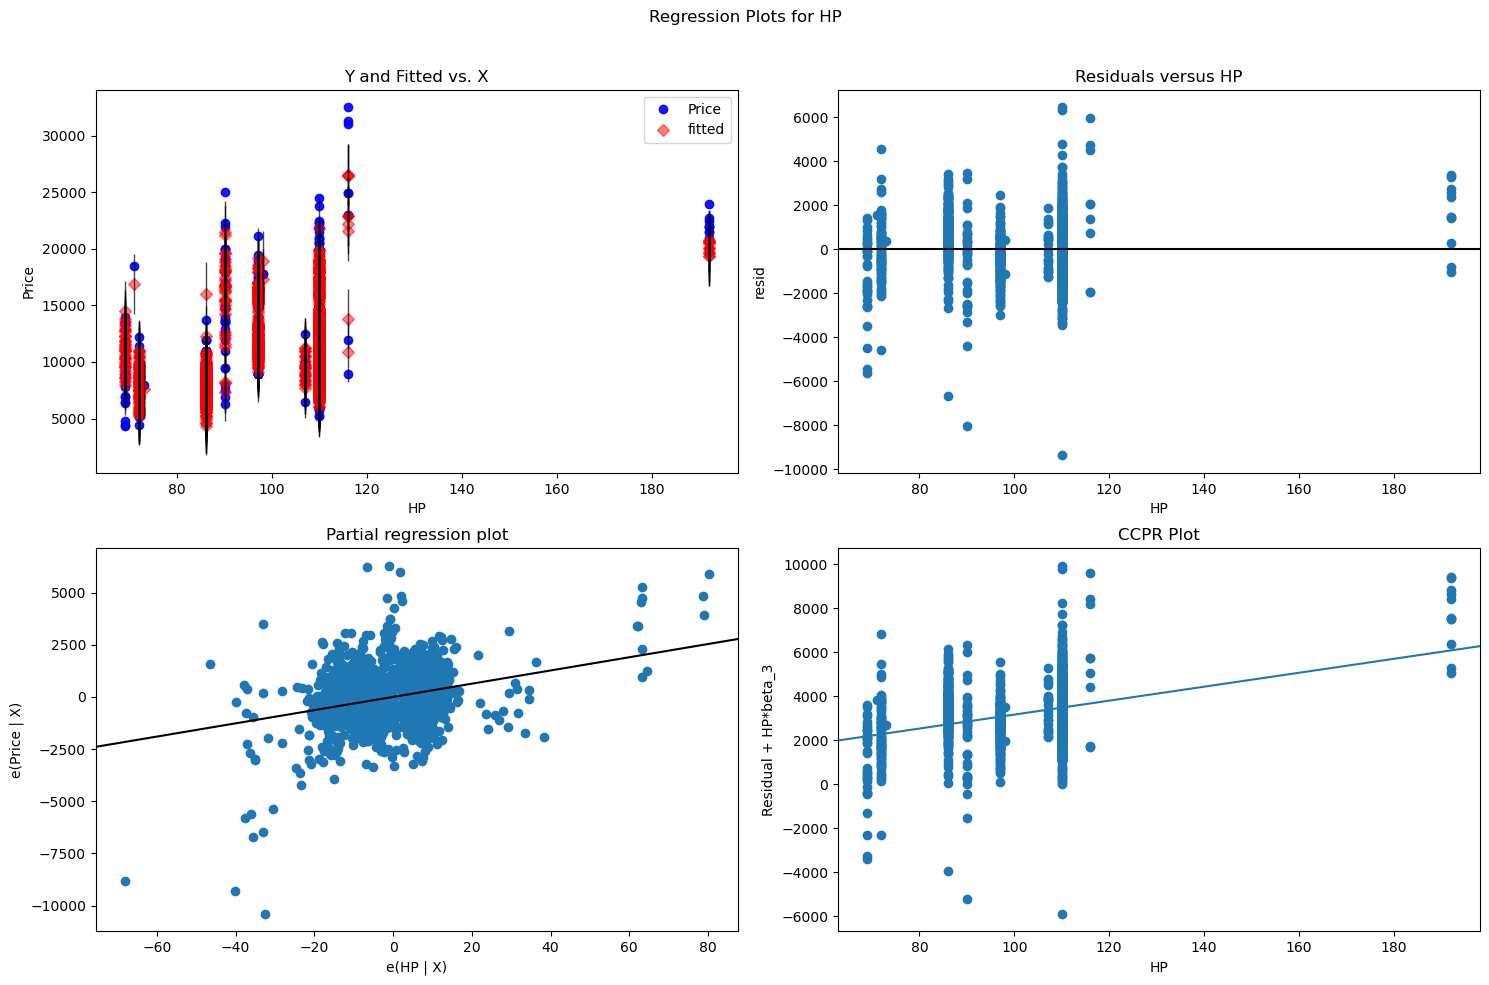

In [148]:
fig=plt.figure(figsize=(15,10))
fig=sm.graphics.plot_regress_exog(model,'HP',fig=fig)
plt.show()

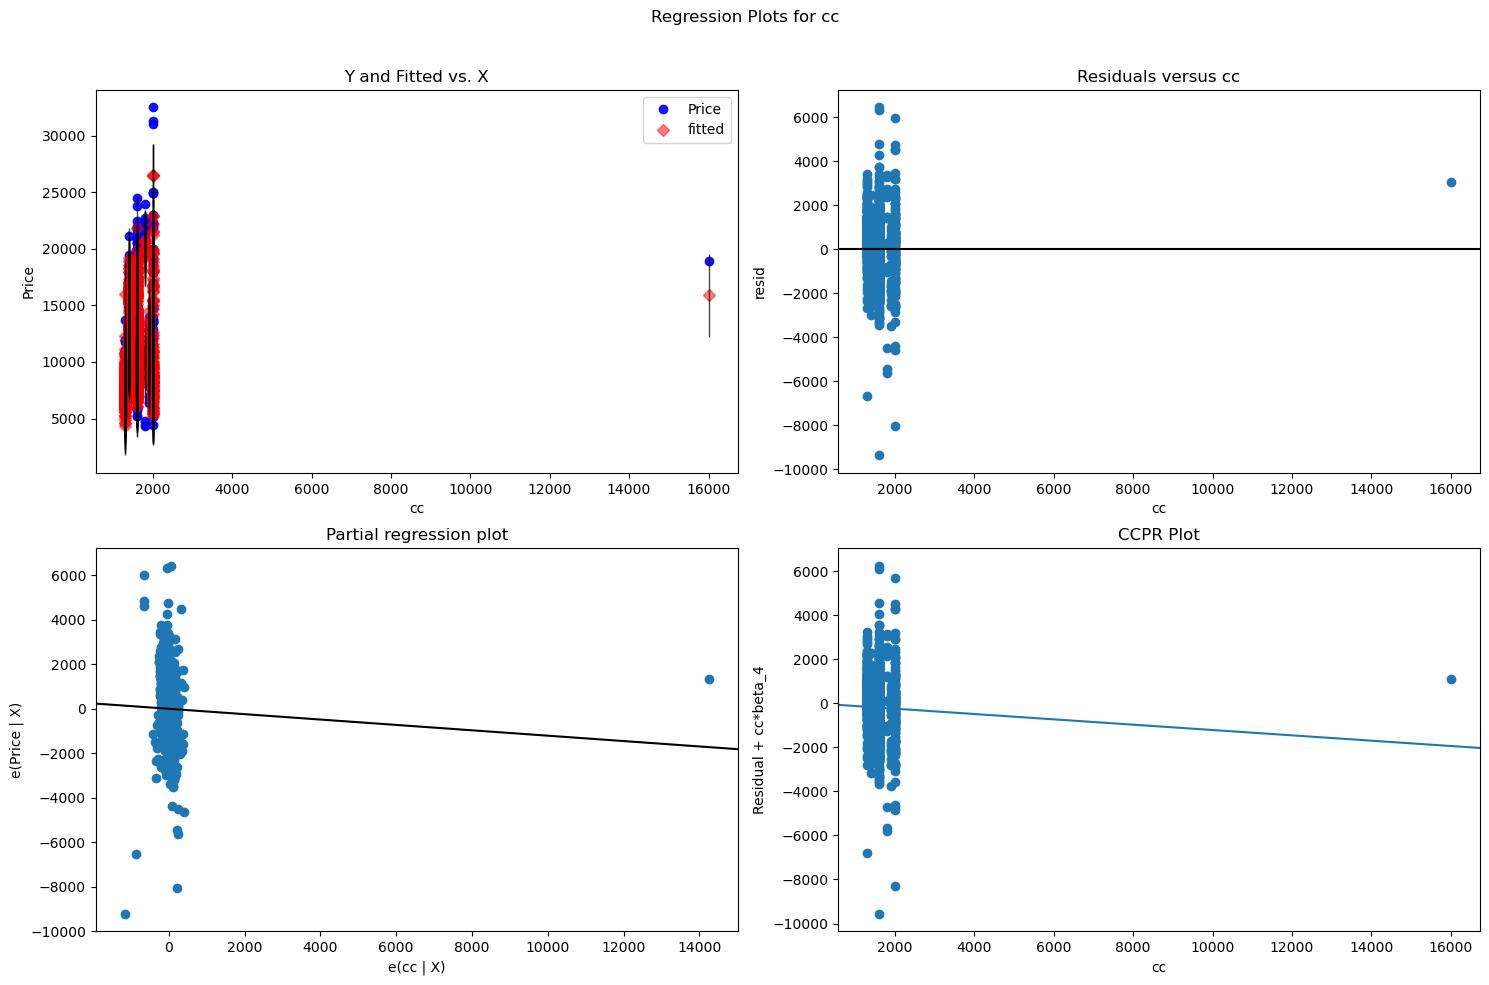

In [149]:
fig=plt.figure(figsize=(15,10))
fig=sm.graphics.plot_regress_exog(model,'cc',fig=fig)
plt.show()

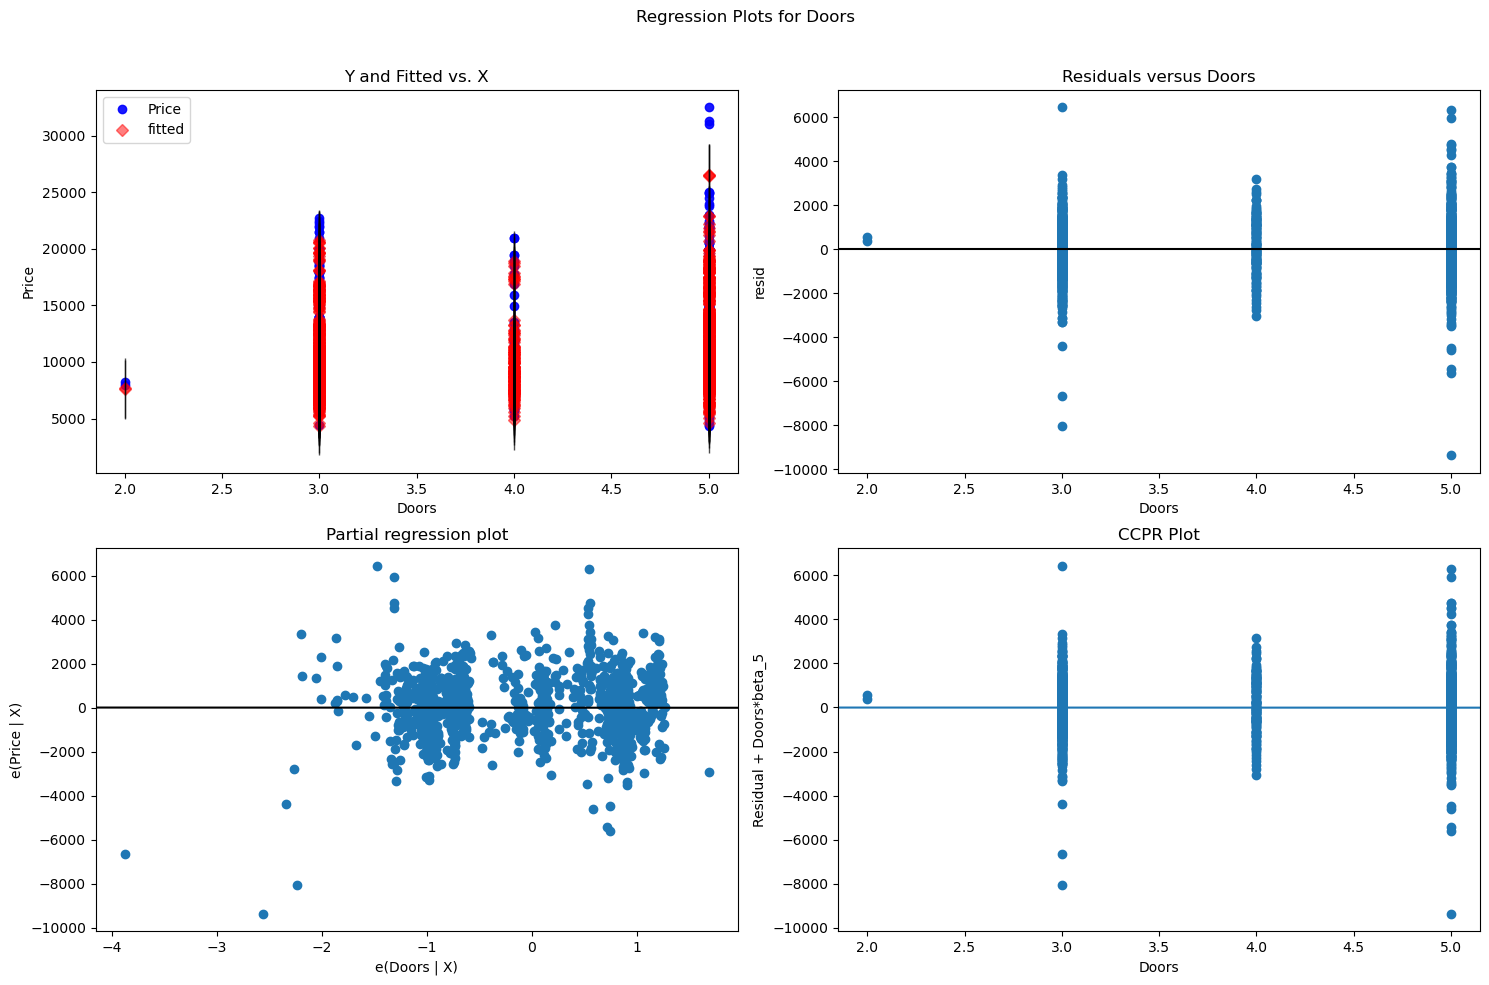

In [150]:
fig=plt.figure(figsize=(15,10))
fig=sm.graphics.plot_regress_exog(model,'Doors',fig=fig)
plt.show()

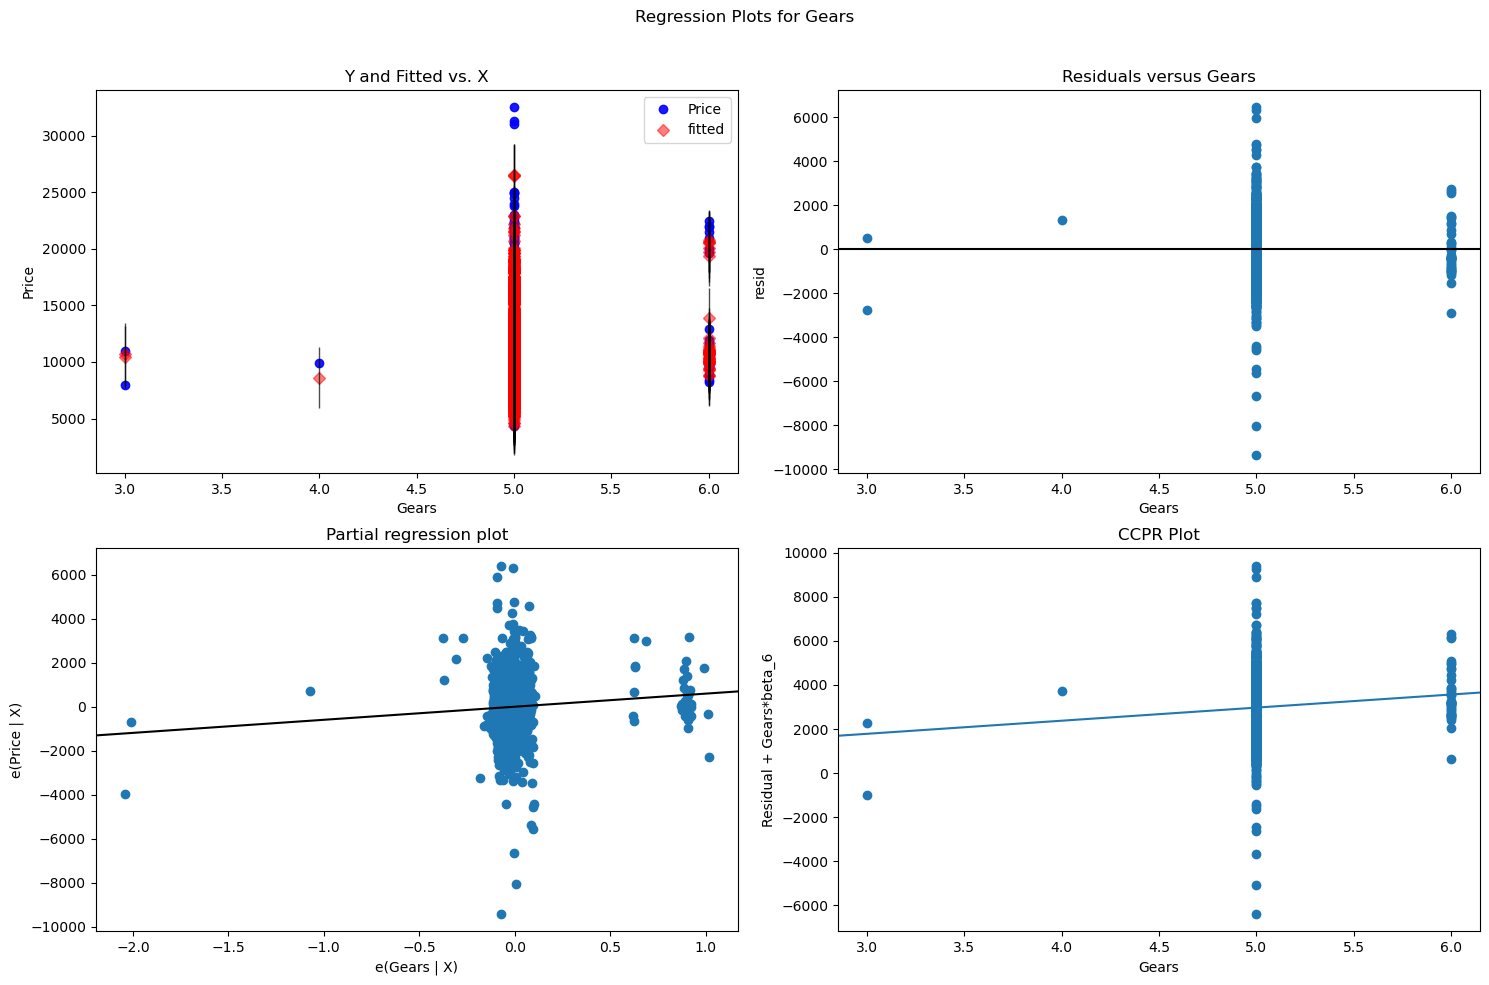

In [151]:
fig=plt.figure(figsize=(15,10))
fig=sm.graphics.plot_regress_exog(model,'Gears',fig=fig)
plt.show()

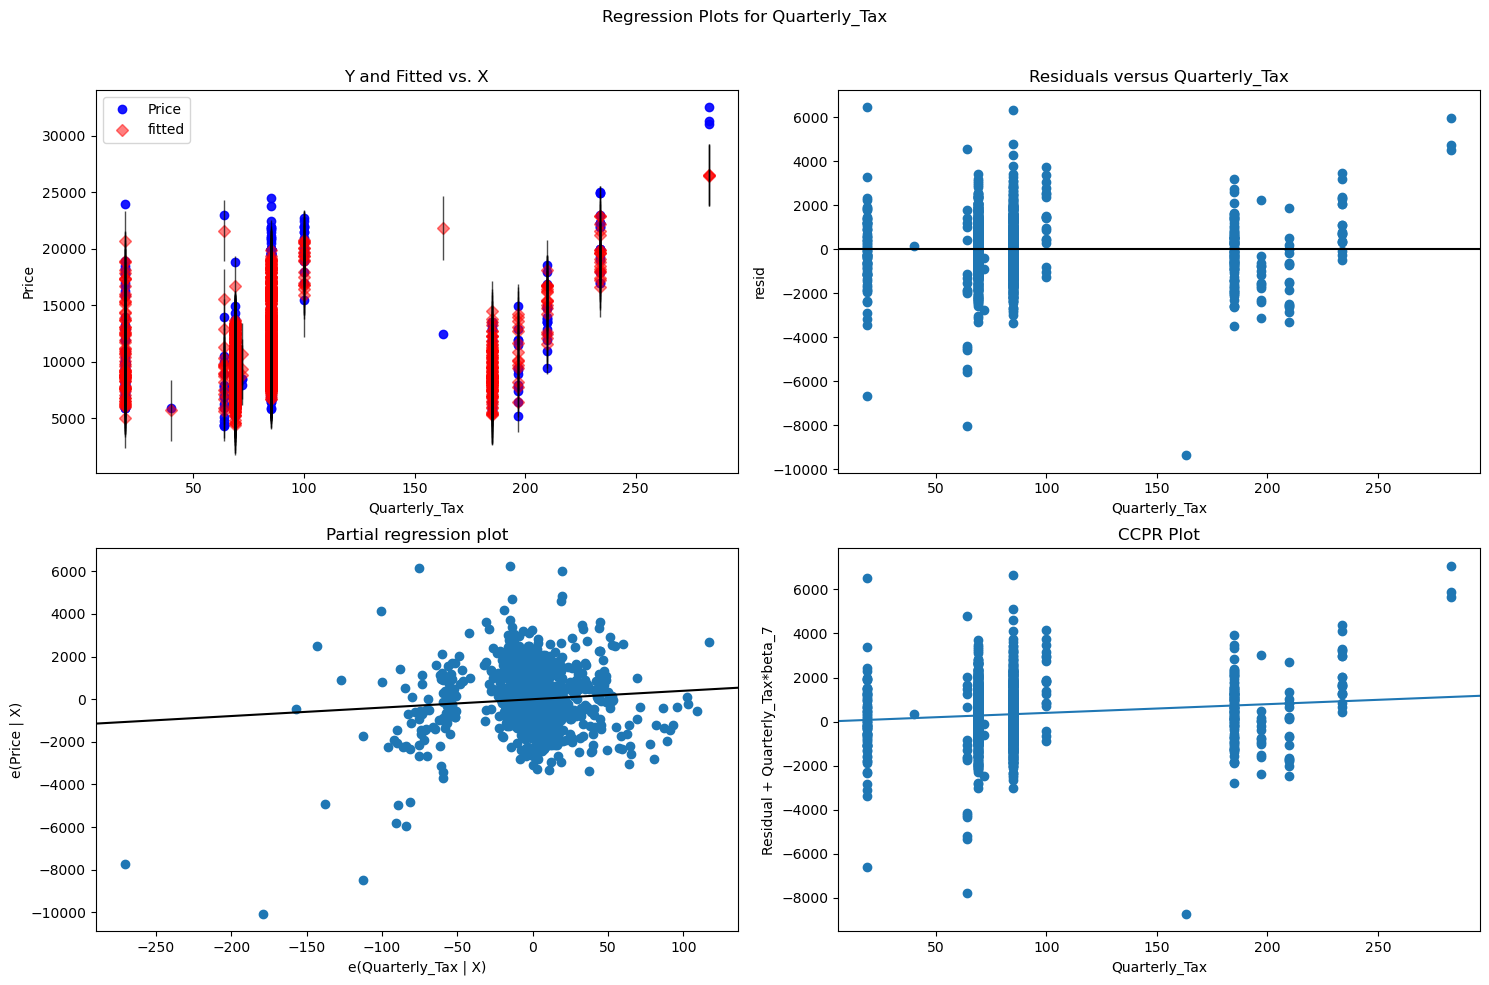

In [152]:
fig=plt.figure(figsize=(15,10))
fig=sm.graphics.plot_regress_exog(model,'Quarterly_Tax',fig=fig)
plt.show()

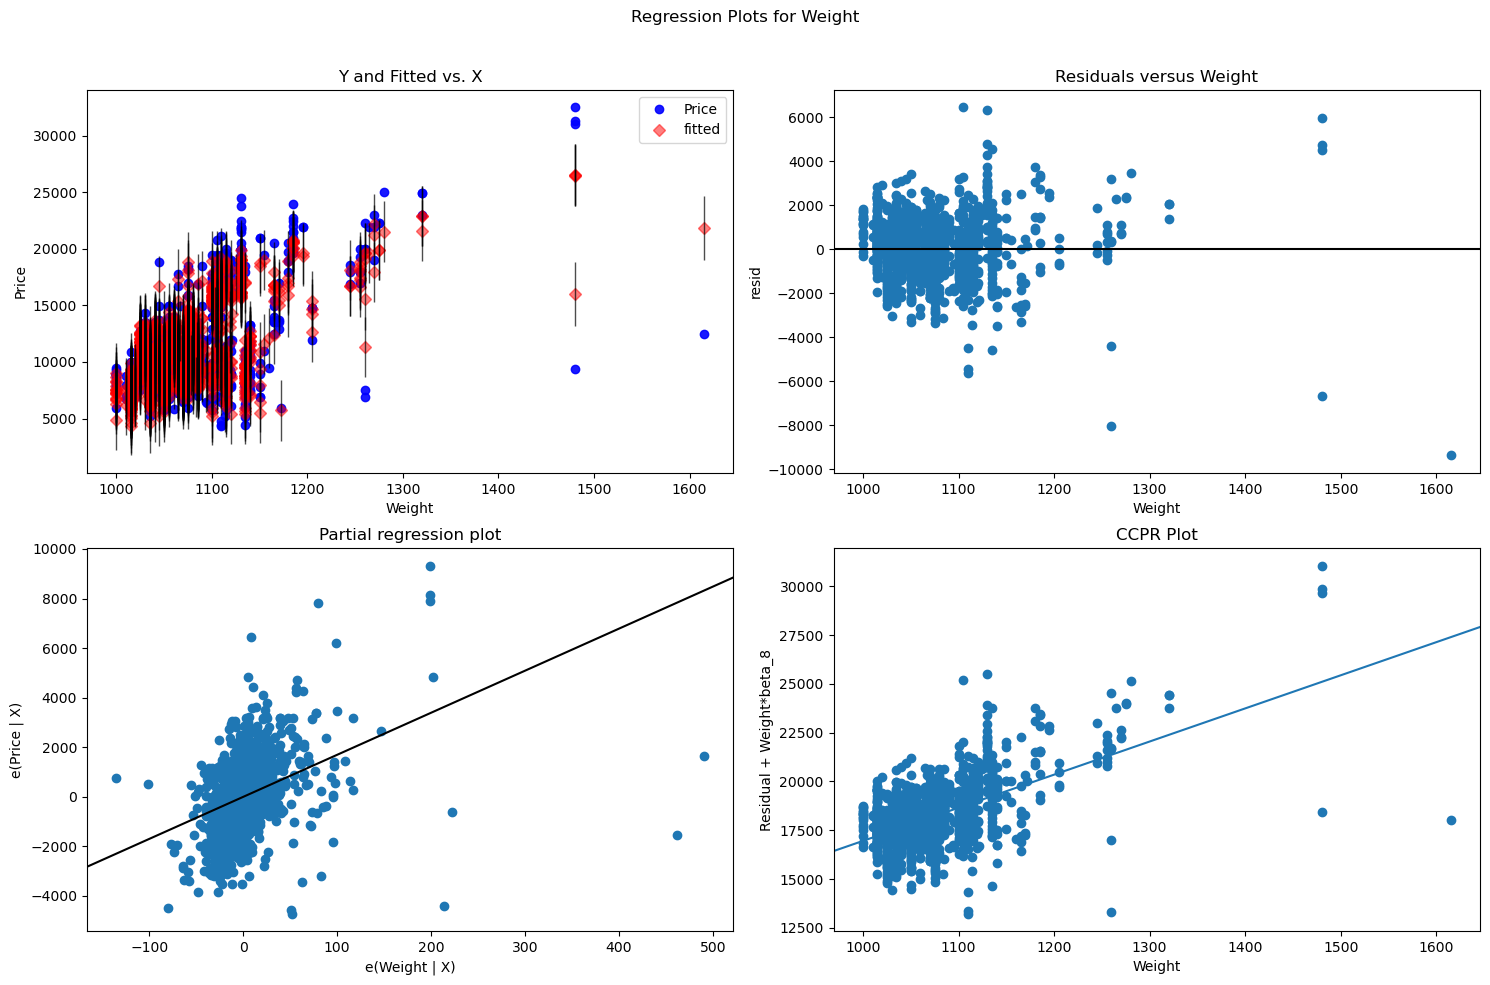

In [153]:
fig=plt.figure(figsize=(15,10))
fig=sm.graphics.plot_regress_exog(model,'Weight',fig=fig)
plt.show()

# cook's Distance

In [130]:
model_influence=model.get_influence()
(c,_)=model_influence.cooks_distance

In [131]:
(c,_)

(array([2.64962564e-05, 3.65460668e-03, 2.55553863e-02, 2.31878065e-02,
        1.14302043e-02, 1.23884179e-02, 3.11121982e-03, 2.80901852e-03,
        5.28558551e-05, 6.83388587e-03, 1.18531743e-02, 2.08698178e-02,
        9.05518079e-03, 7.11076506e-03, 4.81255370e-02, 4.55550364e-02,
        1.47917331e-02, 4.44019365e-03, 1.69993736e-03, 3.99363634e-02,
        6.08628041e-04, 1.22997651e-02, 2.28337576e-03, 2.15977000e-04,
        6.00485777e-03, 4.43262172e-03, 2.67612080e-03, 3.28473798e-02,
        1.03151489e-03, 1.51104626e-04, 3.28164666e-05, 9.07970048e-06,
        8.17741552e-04, 1.00239191e-04, 2.18081482e-02, 8.84928027e-03,
        4.36551851e-02, 5.68744297e-05, 6.25167081e-02, 1.85525357e-03,
        2.27307299e-03, 1.55244650e-03, 1.56379369e-04, 2.73167923e-02,
        1.17346160e-04, 1.12202649e-01, 4.28134712e-02, 5.41565252e-03,
        1.91163485e-01, 3.06028195e-01]),
 array([1.        , 0.99999742, 0.99967997, 0.99974785, 0.99995597,
        0.99994626, 0.9999

# c is more than 0.02

In [159]:
(np.argmax(c),np.max(c))

(49, 0.3060281954699341)

# Detecting High influence points

In [168]:
from statsmodels.graphics.regressionplots import influence_plot

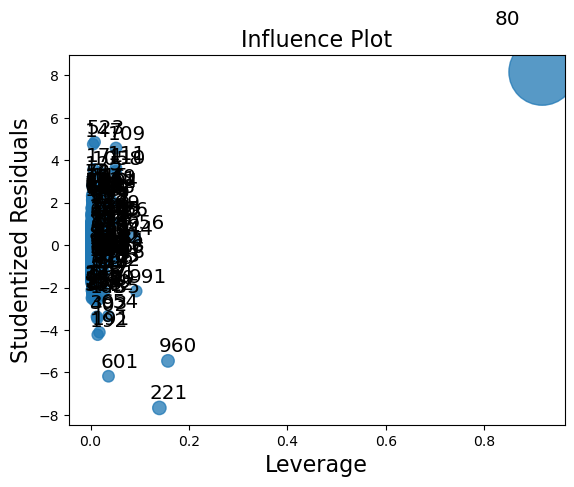

In [169]:
influence_plot(model,figsize=(15,15))
plt.show()

In [170]:
toyota.shape

(1436, 9)

cutoff

In [171]:
k=toyota.shape[1]
n=toyota.shape[0]
leverage_cutoff=3*((k+1)/n)
leverage_cutoff

0.020891364902506964

# from the above data it clear 80 is the high influence point

In [172]:
toyota[toyota.index.isin([80])]

,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
80,18950,25,20019,110,16000,5,5,100,1180


In [173]:
toyota_new=toyota.drop(toyota.index[80],axis=0).reset_index()
toyota_new


,index,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,0,13500,23,46986,90,2000,3,5,210,1165
1,1,13750,23,72937,90,2000,3,5,210,1165
2,2,13950,24,41711,90,2000,3,5,210,1165
3,3,14950,26,48000,90,2000,3,5,210,1165
4,4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...,...
1430,1431,7500,69,20544,86,1300,3,5,69,1025
1431,1432,10845,72,19000,86,1300,3,5,69,1015
1432,1433,8500,71,17016,86,1300,3,5,69,1015
1433,1434,7250,70,16916,86,1300,3,5,69,1015


In [174]:
toyota_new=toyota_new.drop(['index'],axis=1)
toyota_new

,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [176]:
final_toyota=smf.ols('Price~Age+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=toyota_new).fit()
final_toyota.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     1186.
Date:                Sat, 23 Sep 2023   Prob (F-statistic):               0.00
Time:                        08:59:04   Log-Likelihood:                -12335.
No. Observations:                1435   AIC:                         2.469e+04
Df Residuals:                    1426   BIC:                         2.473e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -6284.7401   1382.748     -4.545      0.000   -8997.180   -3572.301
Age            -120.4550      2.562    -47.021      0.000    -125.480    -115.430
KM               -0.0178      0.001    -13.973      0.000      -0.020      -0.015
HP               39.3463      2.911     13.516      0.000      33.636      45.057
cc               -2.5242      0.307     -8.216      0.000      -3.127      -1.922
Doors           -27.2285     39.241     -0.694      0.488    -104.206      49.749
Gears           523.9416    192.865      2.717      0.007     145.612     902.271
Quarterly_Tax     9.0440      1.425      6.348      0.000       6.249      11.839
Weight           20.1655      1.116     18.076      0.000      17.977      22.354
==============================================================================
Omnibus:                      246.945   Durbin-Watson:                   1.595
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2706.374
Skew:                          -0.443   Prob(JB):                         0.00
Kurtosis:                       9.669   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# split the data into train and test

In [177]:
X=toyota_new[['Age','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight']]
y=toyota_new['Price']

In [179]:
X.head()

,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,23,46986,90,2000,3,5,210,1165
1,23,72937,90,2000,3,5,210,1165
2,24,41711,90,2000,3,5,210,1165
3,26,48000,90,2000,3,5,210,1165
4,30,38500,90,2000,3,5,210,1170


In [180]:
y.head()

0    13500
1    13750
2    13950
3    14950
4    13750
Name: Price, dtype: int64

In [181]:
from sklearn.model_selection import train_test_split

In [182]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1148, 8), (287, 8), (1148,), (287,))

# Build  the model

In [183]:
from sklearn.linear_model import LinearRegression

In [184]:
reg_model=LinearRegression()

In [186]:
reg_model.fit(X_train,y_train)

LinearRegression()

train the model

In [187]:
train_pred=reg_model.predict(X_train)
train_pred

array([ 7081.91915081, 18383.65155863, 11248.19489022, ...,
        7718.98271013, 16784.53151856, 16946.0687834 ])

test the model

In [192]:
test_pred=reg_model.predict(X_test)
test_pred

array([ 6946.47519716,  8523.05757046, 13505.84327711,  5772.21627159,
       11102.19348389, 11655.59568214,  8856.93972566, 12617.47562872,
        9695.02155309, 13635.38034226, 27087.06456004, 16654.14617593,
        7728.89985781, 10565.05220059,  9892.5416992 ,  9224.38219197,
       10628.02252004,  9465.27882952,  7900.94147917,  7821.670676  ,
       18106.37677736,  7788.83211366,  7784.82857108, 18913.90134259,
        8381.9270458 ,  8978.08088117, 13014.54477182,  6204.24205441,
       12147.91194451, 21047.01790674,  7146.8422809 ,  9234.84517451,
       11479.47284948, 11354.93999172,  8825.08433822,  9456.36596336,
       15256.21031471, 10873.80467958, 10295.5292169 ,  7726.68906607,
       11011.51867973, 10680.18004682,  9361.32412357,  5899.40655842,
       13419.38156053,  6692.15595158,  8909.05193406, 10678.91120851,
        9527.91792731, 10747.84020018, 10787.50616949, 10394.75945774,
       10304.63402918,  7861.61025563, 16965.08310946,  9051.46681851,
      

 regression

In [193]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [194]:
train_mse=mean_squared_error(y_train,train_pred)
train_mse

1724957.3564531852

In [195]:
test_mse=mean_squared_error(y_test,test_pred)
test_mse

1711432.2489176427

In [196]:
train_rmse=np.sqrt(train_mse)
test_rmse=np.sqrt(test_mse)

In [197]:
train_rmse,test_rmse

(1313.3763194352125, 1308.217202500274)

# predicting new data

In [200]:
new_data=pd.DataFrame({'Age':72,'KM':18000,'HP':86,'cc':1300,'Doors':3,'Gears':5,'Quarterly_Tax':60,'Weight':1015},index=[1])
new_data

,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
1,72,18000,86,1300,3,5,60,1015


In [201]:
reg_model.predict(new_data)

array([8220.36784873])